In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import math

In [16]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS_ns.csv')
df

x          y          z    theta  time  phi
0          0.000    0.00000    0.00000 -1.57080     0    0
1       -342.709   -3.54843    1.61724 -1.56139     1    0
2       -685.357   -6.94076    6.47385 -1.55196     2    0
3      -1027.880  -10.02320   14.58460 -1.54245     3    0
4      -1370.220  -12.64680   25.97400 -1.53285     4    0
...          ...        ...        ...      ...   ...  ...
33945  31502.800  531.87700  851.73800  1.55257    92    0
33946  31848.100  539.71400  856.92300  1.55834    93    0
33947  32193.500  547.52500  860.21200  1.56380    94    0
33948  32539.000  555.32100  861.68400  1.56909    95    0
33949  32884.400  563.11300  861.37500  1.57433    96    0

[33950 rows x 6 columns]

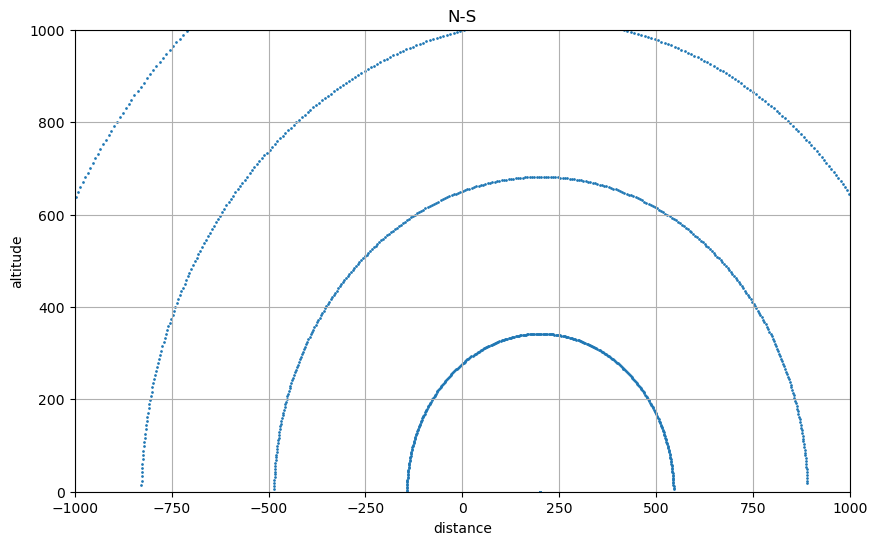

In [23]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS_ns.csv')
df['x'] = df['x'] + 200

plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'],s=0.9)

dist = 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
plt.title('N-S')
plt.grid()
plt.show()

In [4]:
df['time'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

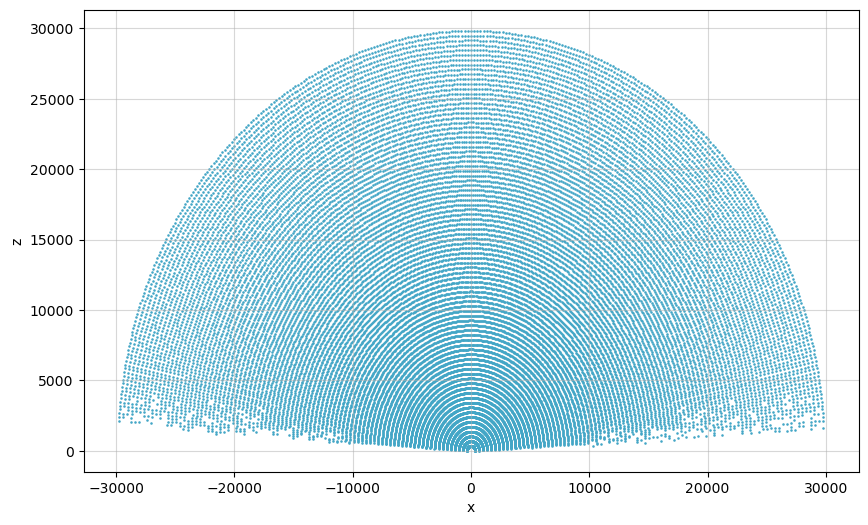

In [21]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_cnds_0.csv')

# df['x'] = df['x'] + 30
group_t = df.groupby('time')

plt.figure(figsize=(10, 6))

for t in df['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        
        wave_eq = CubicSpline(df_['x'],df_['z'], bc_type='natural')
        
        x_l = []
        y_l = []
        for x0 in df_['x'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        plt.scatter(x_l,y_l, s=0.7, color='#43A6C6')

plt.xlabel('x')
plt.ylabel('z')
plt.grid(alpha=0.5)
plt.show()


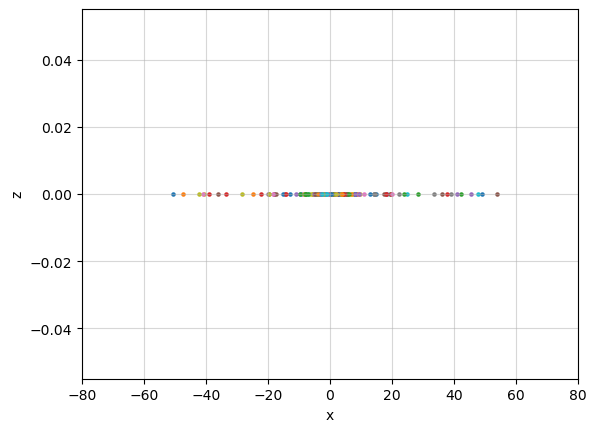

In [22]:
t = 34
group_t = df.groupby('time')
# plt.figure(figsize=(10, 6))

df_ = group_t.get_group(t).sort_values('x')

wave_eq = CubicSpline(df_['x'],df_['z'], bc_type='natural')
for x0 in df_['x'].to_numpy():
    
    dz_dx = wave_eq.derivative()(x0)

    land_x = x0 + wave_eq(x0) * dz_dx
    land_y = 0
    # if np.abs(land_x) < 50:
    plt.scatter(land_x,land_y, s=5)

plt.xlim((-80,80))
plt.xlabel('x')
plt.ylabel('z')
plt.grid(alpha=0.5)
plt.show()


In [12]:
df_t = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_cnds_0.csv')
df_t

x  y             z    theta  time  phi
0          0.0  0  0.000000e+00 -1.57080     0    0
1       -343.0  0  2.100270e-14 -1.57080     1    0
2       -686.0  0  4.200540e-14 -1.57080     2    0
3      -1029.0  0  6.300810e-14 -1.57080     3    0
4      -1372.0  0  8.401080e-14 -1.57080     4    0
...        ... ..           ...      ...   ...  ...
30795  28467.9  0  2.555340e+02  1.56182    83    0
30796  28810.8  0  2.586120e+02  1.56182    84    0
30797  29153.8  0  2.616910e+02  1.56182    85    0
30798  29496.8  0  2.647700e+02  1.56182    86    0
30799  29839.8  0  2.678490e+02  1.56182    87    0

[30800 rows x 6 columns]

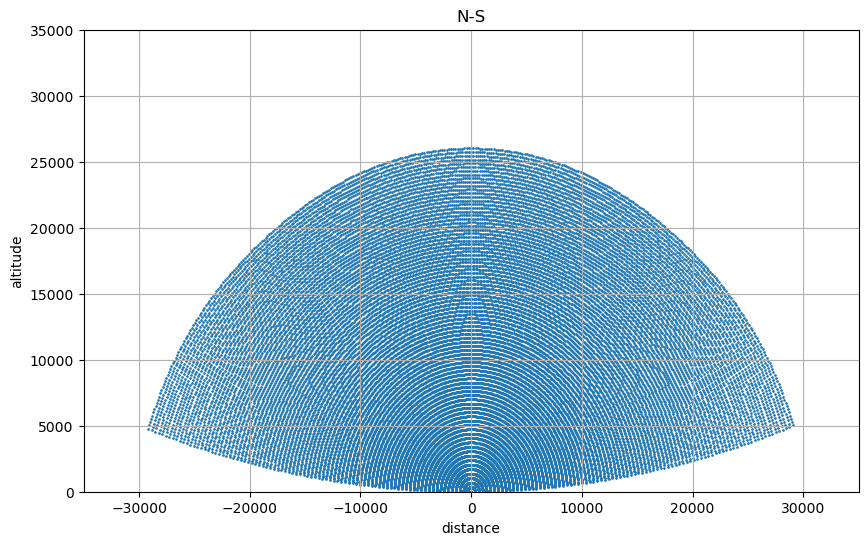

In [14]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_wTemp.csv')

plt.figure(figsize=(10, 6))
plt.scatter(df['x'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
plt.title('N-S')
plt.grid()
plt.show()

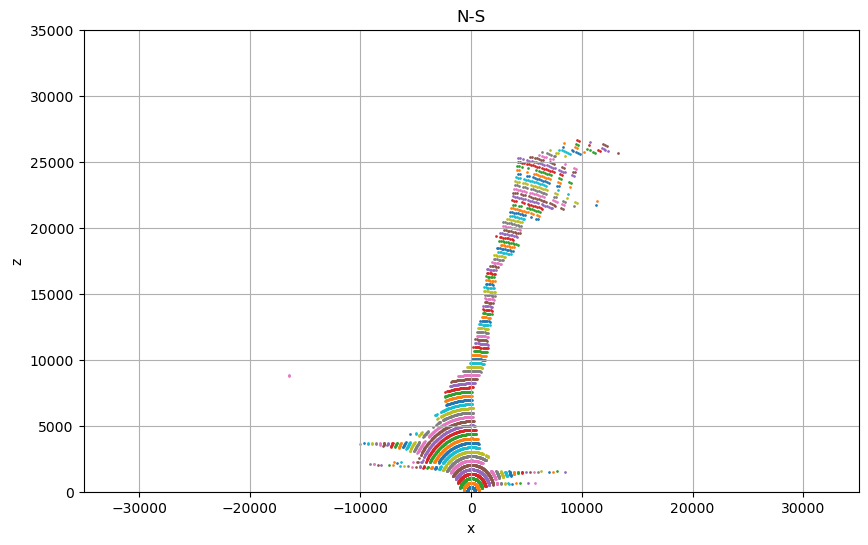

In [41]:
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS_ns.csv')
dfa = dfa[dfa['phi'] == 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

for t in dfa['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        df_ = df_.drop_duplicates(subset='x')
        
        wave_eq = CubicSpline(df_['x'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['x'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel('x')
plt.ylabel('z')
plt.title('N-S')
plt.grid()
plt.show()

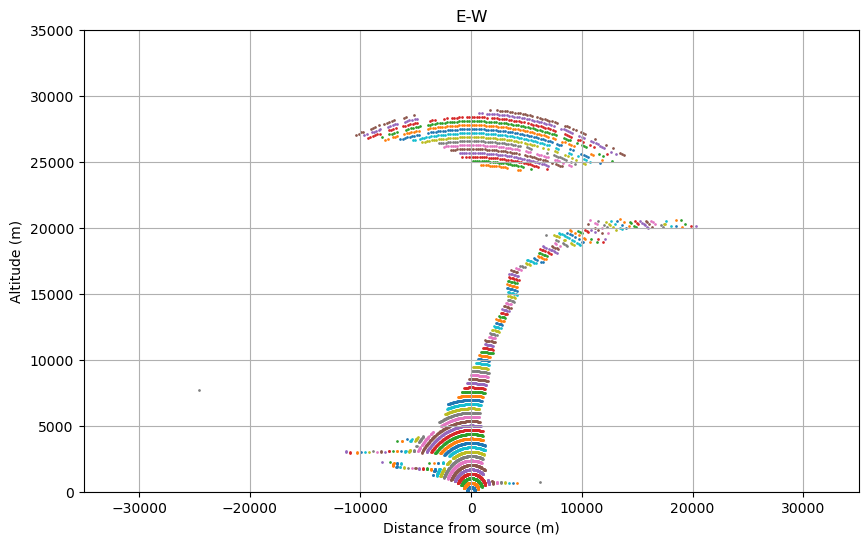

In [43]:
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa = dfa[dfa['phi'] != 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

for t in dfa['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['y'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        
        plt.scatter(x_l,y_l, s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.show()

In [3]:
df = pd.read_csv('/home/murali/Documents/rass/data/sim_data/dived_data/cpp_data/alglib_CS_0/backscatter_coordinates_0_G250-r2.csv')
df

x_val     y_val       z_val      x_land     y_land  time_step  \
0          -340.939  -5.55582     22.4729 -113.522206  -2.189402          1   
1          -340.715  -5.46610     25.5526  -88.802349  -2.092762          1   
2          -340.463  -5.37681     28.6299  -63.179213  -2.097703          1   
3          -340.183  -5.28795     31.7046  -37.663917  -2.224865          1   
4          -339.876  -5.19953     34.7764  -13.568053  -2.484695          1   
...             ...       ...         ...         ...        ...        ...   
11639402  11055.200  23.84810  26706.1000  -94.804954  23.956132         96   
11639403  -9686.020  33.21680  27384.1000 -117.557055  33.043913         96   
11639404  -9894.550  32.59690  27310.2000 -116.905762  32.699399         96   
11639405 -10730.900  29.33090  26996.9000 -117.593699  29.501155         96   
11639406 -10931.500  28.03660  26916.8000 -127.806358  28.032657         96   

              phi     theta  
0         0.00000 -1.502690  
1         0.00000 -1.493680  
2         0.00000 -1.484680  
3         0.00000 -1.475670  
4         0.00000 -1.466660  
...           ...       ...  
11639402  3.14159 -0.394818  
11639403  3.14159  0.336398  
11639404  3.14159  0.344814  
11639405  3.14159  0.375858  
11639406  3.14159  0.383050  

[11639407 rows x 8 columns]

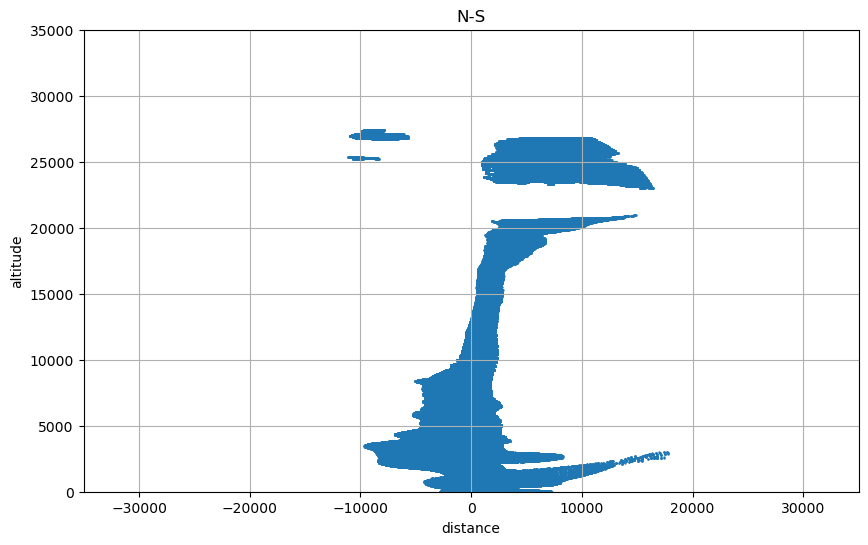

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

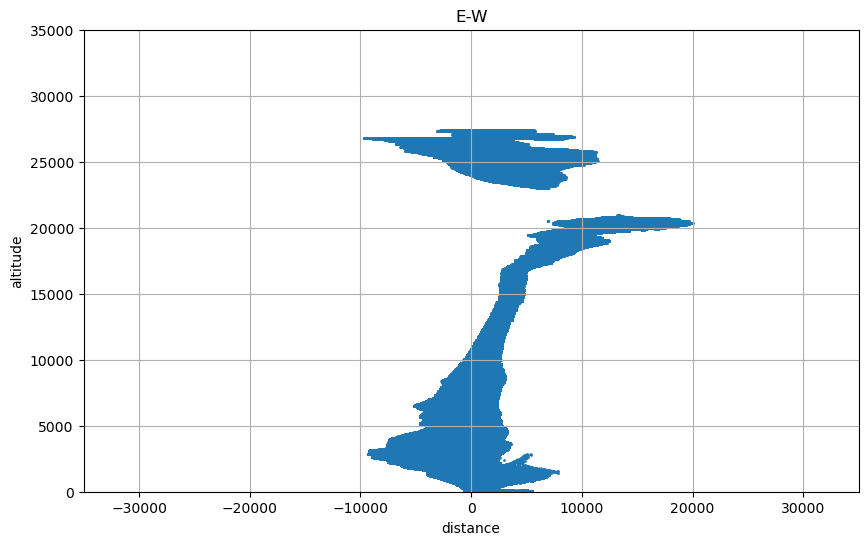

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y_val'],df['z_val'], s=0.5)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.title('E-W')
plt.xlabel("distance")
plt.ylabel("altitude")

plt.grid()
plt.show()

In [4]:
df

x_val     y_val       z_val      x_land     y_land  time_step  \
0          -340.939  -5.55582     22.4729 -113.522206  -2.189402          1   
1          -340.715  -5.46610     25.5526  -88.802349  -2.092762          1   
2          -340.463  -5.37681     28.6299  -63.179213  -2.097703          1   
3          -340.183  -5.28795     31.7046  -37.663917  -2.224865          1   
4          -339.876  -5.19953     34.7764  -13.568053  -2.484695          1   
...             ...       ...         ...         ...        ...        ...   
11639402  11055.200  23.84810  26706.1000  -94.804954  23.956132         96   
11639403  -9686.020  33.21680  27384.1000 -117.557055  33.043913         96   
11639404  -9894.550  32.59690  27310.2000 -116.905762  32.699399         96   
11639405 -10730.900  29.33090  26996.9000 -117.593699  29.501155         96   
11639406 -10931.500  28.03660  26916.8000 -127.806358  28.032657         96   

              phi     theta  
0         0.00000 -1.502690  
1         0.00000 -1.493680  
2         0.00000 -1.484680  
3         0.00000 -1.475670  
4         0.00000 -1.466660  
...           ...       ...  
11639402  3.14159 -0.394818  
11639403  3.14159  0.336398  
11639404  3.14159  0.344814  
11639405  3.14159  0.375858  
11639406  3.14159  0.383050  

[11639407 rows x 8 columns]

In [26]:
def find_discontinuity(points, threshold):
    for i in range(len(points)-1):
        if abs(points[i+1] - points[i]) > threshold:
            print(f'discountinutity at {i+1} , i: {points[i]},  i+1: {points[i+1]}') 
            low, high = points[i], points[i+1]
            return low, high
    return print('None')

threshold = 500
SpeedOfSound = 343
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS_ns.csv')
# df = df[df['phi'] != 0].reset_index(drop=True)
df = df[df['z']>=0]
df = df[(df['theta'] <= np.pi/2) & (df['theta']>= -np.pi/2)]
# df = df[(df['phi'] <= np.pi/2) & (df['phi']>= 0)]
df['x'] = df['x'] + 150

group_t = df.groupby('time')

z_l = []

for t in df['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        df_ = df_.drop_duplicates(subset='x')
        
        wave_eq = CubicSpline(df_['x'],df_['z'])
    
        for x0 in df_['x'].to_numpy():
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 65:
                # x_l.append(x0)
                z_l.append(wave_eq(x0))

z_values = np.unique(np.sort(z_l))
low, high = find_discontinuity(z_values,threshold)

time_delta = (high - low)/ SpeedOfSound
min_time = np.min(df[(df['z'] > low) & (df['z'] < high)]['time'].unique())
max_time = min_time + time_delta
print(f"min_time: {min_time}, max_time: {max_time}")

wave_fronts = df[(df['time']>=min_time) & (df['time']<=max_time)]

group_t = wave_fronts.groupby('time')
plt.figure(figsize=(10, 6))

for t in wave_fronts['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])

        x_land = []
        y_land = []
        for x0 in df_['x'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            x_land.append(land_x)
            y_land.append(0)
        plt.scatter(x_land,y_land,s=1)


dist = 500
plt.xlim((-dist,dist))
plt.ylim((-dist,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('N-S')
plt.grid()
plt.show()

None


TypeError: cannot unpack non-iterable NoneType object

discountinutity at 4593 , i: 20677.9,  i+1: 24370.6
min_time: 69, max_time: 79.76588921282799


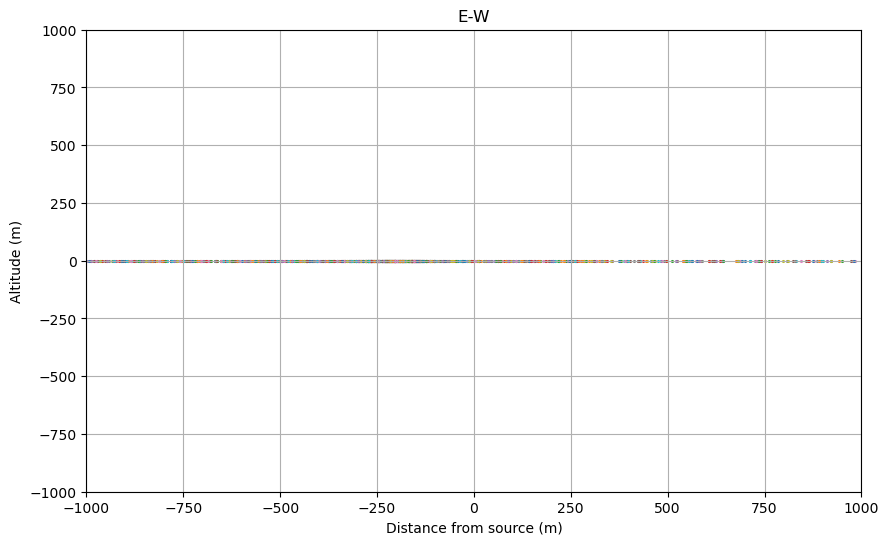

In [3]:
def find_discontinuity(points, threshold):
    for i in range(len(points)-1):
        if abs(points[i+1] - points[i]) > threshold:
            print(f'discountinutity at {i+1} , i: {points[i]},  i+1: {points[i+1]}') 
            low, high = points[i], points[i+1]
            return low, high
    return print('None')

threshold = 1000
SpeedOfSound = 343
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
df = df[df['phi'] != 0].reset_index(drop=True)
df = df[df['z']>=0]
df = df[(df['theta'] <= np.pi/2) & (df['theta']>= -np.pi/2)]
# df = df[(df['phi'] <= np.pi/2) & (df['phi']>= 0)]

# df['y'] = df['y'] - 500

group_t = df.groupby('time')

z_l = []

for t in df['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])
    
        for x0 in df_['y'].to_numpy():
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 65:
                # x_l.append(x0)
                z_l.append(wave_eq(x0))

z_values = np.unique(np.sort(z_l))
low, high = find_discontinuity(z_values,threshold)

time_delta = (high - low)/ SpeedOfSound
min_time = np.min(df[(df['z'] > low) & (df['z'] < high)]['time'].unique())
max_time = min_time + time_delta
print(f"min_time: {min_time}, max_time: {max_time}")

wave_fronts = df[(df['time']>=min_time) & (df['time']<=max_time)]

group_t = wave_fronts.groupby('time')
plt.figure(figsize=(10, 6))

for t in wave_fronts['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])
        
        for x0 in df_['y'].to_numpy():
            dz_dx = wave_eq.derivative()(x0)
            land_x = x0 + wave_eq(x0) * dz_dx
            plt.scatter(land_x,0,s=1.5)

dist = 1000
plt.xlim((-dist,dist))
plt.ylim((-dist,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.show()

In [55]:
df[(df['z'] > low) & (df['z'] < high)]['time'].unique()

array([96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80,
       79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69])

In [4]:
df

x         y          z    theta  time     phi
1      1.34250  -347.216   10.57630 -1.50951     1  1.5708
2      2.61231  -691.919   41.79410 -1.45080     2  1.5708
3      3.77366 -1032.000   92.18940 -1.39702     3  1.5708
4      4.85655 -1366.080  159.52600 -1.35006     4  1.5708
5      5.97203 -1693.670  241.03000 -1.31134     5  1.5708
...        ...       ...        ...      ...   ...     ...
33562  0.00000     0.000    0.00000  1.53489     0  1.5708
33563  1.33996   340.570    6.34506  1.56974     1  1.5708
33659  0.00000     0.000    0.00000  1.54387     0  1.5708
33756  0.00000     0.000    0.00000  1.55284     0  1.5708
33853  0.00000     0.000    0.00000  1.56182     0  1.5708

[31740 rows x 6 columns]

In [31]:
df_i = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_cnds_0.csv')
df_i

x  y             z    theta  time  phi
0          0.0  0  0.000000e+00 -1.57080     0    0
1       -343.0  0  2.100270e-14 -1.57080     1    0
2       -686.0  0  4.200540e-14 -1.57080     2    0
3      -1029.0  0  6.300810e-14 -1.57080     3    0
4      -1372.0  0  8.401080e-14 -1.57080     4    0
...        ... ..           ...      ...   ...  ...
30795  28467.9  0  2.555340e+02  1.56182    83    0
30796  28810.8  0  2.586120e+02  1.56182    84    0
30797  29153.8  0  2.616910e+02  1.56182    85    0
30798  29496.8  0  2.647700e+02  1.56182    86    0
30799  29839.8  0  2.678490e+02  1.56182    87    0

[30800 rows x 6 columns]

In [41]:
df_i[(df_i['theta']>-0.005) & (df_i['theta']<0.005)]

x  y        z         theta  time  phi
15400  0.000000e+00  0      0.0  4.843350e-15     0    0
15401  1.661270e-12  0    343.0  4.843350e-15     1    0
15402  3.322540e-12  0    686.0  4.843350e-15     2    0
15403  4.983810e-12  0   1029.0  4.843350e-15     3    0
15404  6.645070e-12  0   1372.0  4.843350e-15     4    0
...             ... ..      ...           ...   ...  ...
15483  1.378850e-10  0  28469.0  4.843350e-15    83    0
15484  1.395470e-10  0  28812.0  4.843350e-15    84    0
15485  1.412080e-10  0  29155.0  4.843350e-15    85    0
15486  1.428690e-10  0  29498.0  4.843350e-15    86    0
15487  1.445300e-10  0  29841.0  4.843350e-15    87    0

[88 rows x 6 columns]

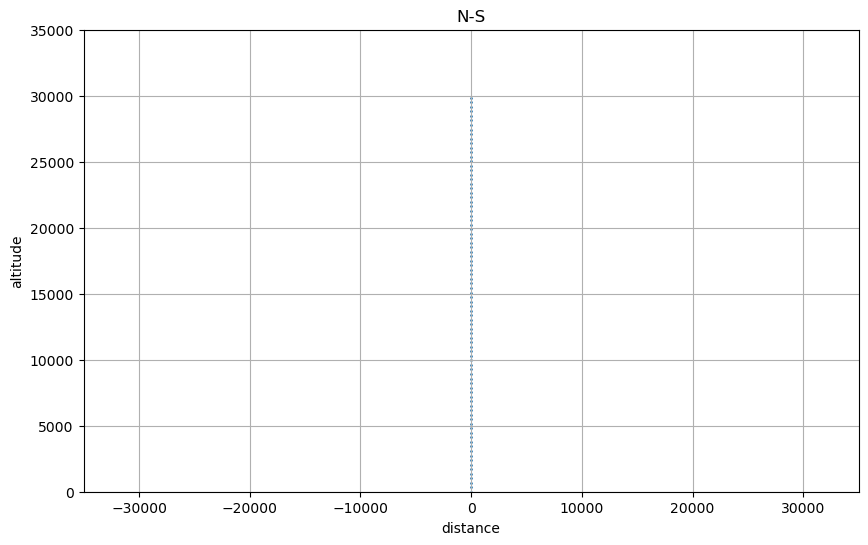

In [44]:
df_th = df_i[df_i['theta'] == 4.843350e-15]

plt.figure(figsize=(10, 6))
plt.scatter(df_th['x'],df_th['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance")
plt.ylabel("altitude")
plt.title('N-S')
plt.grid()
plt.show()

In [46]:
df_th[(df_th['z'] > low) & (df_th['z'] < high)]

x  y        z         theta  time  phi
15462  1.029990e-10  0  21266.0  4.843350e-15    62    0
15463  1.046600e-10  0  21609.0  4.843350e-15    63    0
15464  1.063210e-10  0  21952.0  4.843350e-15    64    0
15465  1.079820e-10  0  22295.0  4.843350e-15    65    0
15466  1.096440e-10  0  22638.0  4.843350e-15    66    0
15467  1.113050e-10  0  22981.0  4.843350e-15    67    0

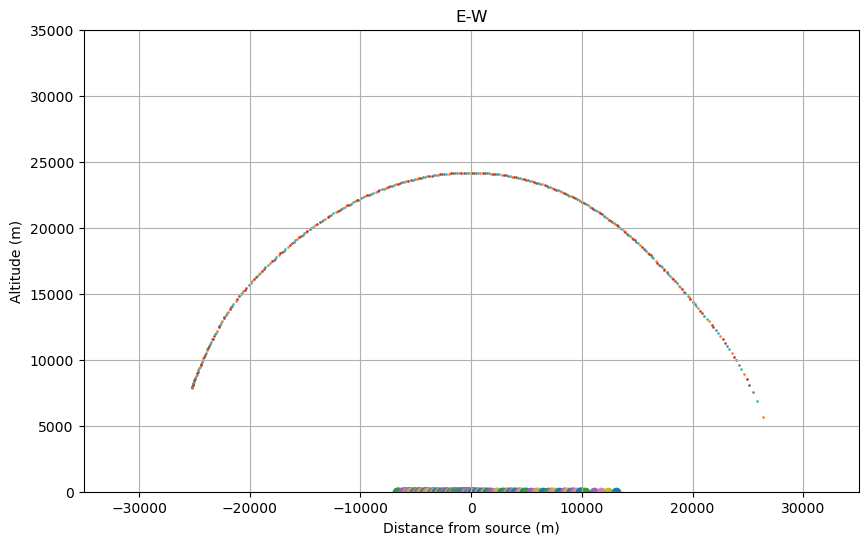

In [10]:
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa = dfa[dfa['phi'] != 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

t = 80

df_ = group_t.get_group(t).sort_values('y')
df_ = df_.drop_duplicates(subset='y')

wave_eq = CubicSpline(df_['y'],df_['z'])

for x0 in df_['y'].to_numpy():
    
    dz_dx = wave_eq.derivative()(x0)

    land_x = x0 + wave_eq(x0) * dz_dx
    # if np.abs(land_x) < 50:
    land_y = 0
    plt.scatter(land_x,land_y)
    plt.scatter(x0,wave_eq(x0),s=0.8)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.show()

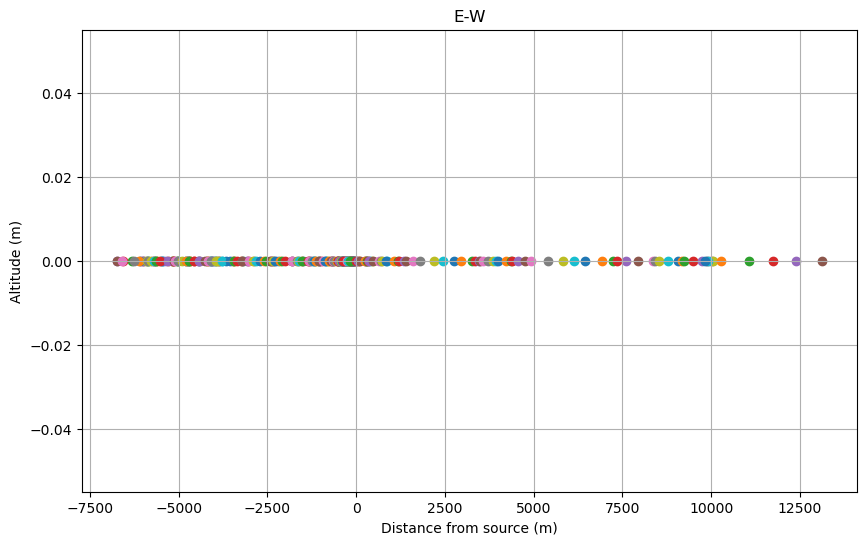

In [14]:
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa = dfa[dfa['phi'] != 0].reset_index(drop=True)
dfa = dfa[dfa['z']>=0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta']>= -np.pi/2)]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['phi']>= 0)]

group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))

t = 80

df_ = group_t.get_group(t).sort_values('y')
df_ = df_.drop_duplicates(subset='y')

wave_eq = CubicSpline(df_['y'],df_['z'])

for x0 in df_['y'].to_numpy():
    
    dz_dx = wave_eq.derivative()(x0)

    land_x = x0 + wave_eq(x0) * dz_dx
    # if np.abs(land_x) < 50:
    land_y = 0
    plt.scatter(land_x,land_y)

# dist = 35 * 1000
# plt.xlim((-dist,dist))
# plt.ylim((0,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.show()

In [3]:
read_cols = ['x_val','y_val','z_val','x_land','y_land']
n_rows = 10000000
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/back_coord.csv', nrows=n_rows)

df = df[df['z_val']>=0]
df = df[(df['theta'] <= np.pi/2) & (df['theta']>= -np.pi/2)]
d = df[(df['phi'] <= np.pi/2) & (df['phi']>= 0)]

df

x_val       y_val        z_val      x_land      y_land  time_step  \
0        -341.729    -6.19520     0.869235 -213.479531   -3.635898          1   
1        -341.700    -6.10269     3.958620 -209.375568   -3.492509          1   
2        -341.642    -6.01056     7.047380 -201.429095   -3.300492          1   
3        -341.557    -5.91881    10.135300 -190.021568   -3.074931          1   
4        -341.444    -5.82746    13.222000 -175.195352   -2.829334          1   
...           ...         ...          ...         ...         ...        ...   
9999995 -2734.010 -4431.14000  2192.010000  173.258977  238.392672         17   
9999996 -2727.790 -4420.55000  2222.340000  170.510993  234.791352         17   
9999997 -2721.250 -4409.81000  2252.940000  170.411100  235.318312         17   
9999998 -2714.320 -4398.96000  2283.880000  173.018799  239.233000         17   
9999999 -2707.080 -4388.00000  2315.030000  177.692127  245.862353         17   

             phi    theta  
0        0.00000 -1.56574  
1        0.00000 -1.55673  
2        0.00000 -1.54772  
3        0.00000 -1.53872  
4        0.00000 -1.52971  
...          ...      ...  
9999995  1.01404 -1.18874  
9999996  1.01404 -1.18337  
9999997  1.01404 -1.17878  
9999998  1.01404 -1.17424  
9999999  1.01404 -1.16985  

[9885004 rows x 8 columns]

In [4]:
df.describe()

x_val         y_val         z_val        x_land        y_land  \
count  9.885004e+06  9.885004e+06  9.885004e+06  9.885004e+06  9.885004e+06   
mean   3.985687e+01 -6.141984e+01  1.979992e+03  6.479526e+00  1.166153e+01   
std    1.650000e+03  1.536450e+03  1.407303e+03  2.365728e+02  1.997689e+02   
min   -5.788460e+03 -5.143500e+03  8.692350e-01 -4.184674e+03 -2.498748e+03   
25%   -7.249443e+02 -7.924413e+02  7.870750e+02  2.811626e+00  1.821918e+00   
50%    1.994825e+01 -8.112520e+00  1.686270e+03  2.791973e+01  2.712861e+01   
75%    7.972452e+02  6.550390e+02  2.987770e+03  5.006017e+01  4.775826e+01   
max    5.799430e+03  5.487780e+03  5.668530e+03  2.543642e+03  3.090877e+03   

          time_step           phi         theta  
count  9.885004e+06  9.885004e+06  9.885004e+06  
mean   8.614720e+00  1.546391e+00 -3.528438e-02  
std    4.726775e+00  9.202279e-01  8.404044e-01  
min    1.000000e+00  0.000000e+00 -1.565740e+00  
25%    5.000000e+00  7.347840e-01 -7.837622e-01  
50%    9.000000e+00  1.532400e+00 -6.152200e-02  
75%    1.300000e+01  2.352700e+00  6.763040e-01  
max    1.700000e+01  3.141590e+00  1.570790e+00

In [5]:
df['time_step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

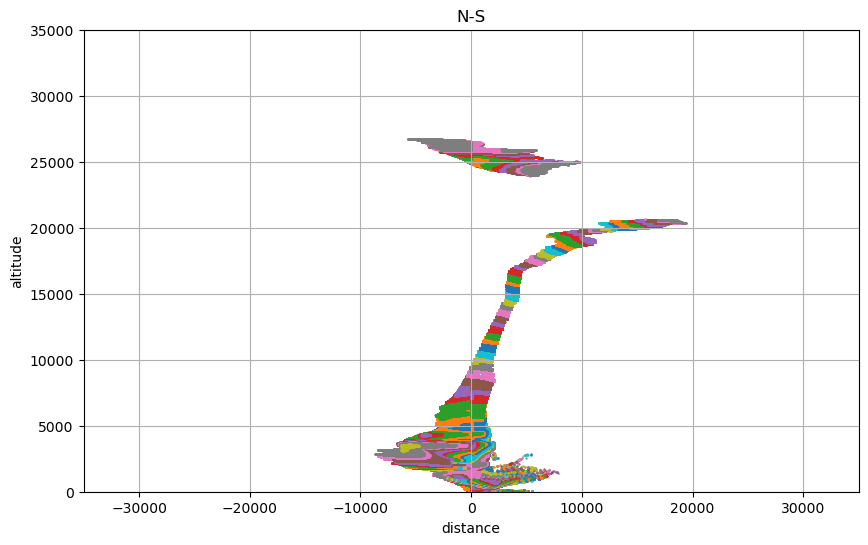

In [12]:
plt.figure(figsize=(10, 6))
n_rows = 1000000

for chunk in pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/back_coord.csv', chunksize=n_rows):
    # Filter the DataFrame once
    filtered_df = chunk[
                        # (chunk['z_val'] >= 0) &
    #                     (chunk['theta'] <= np.pi/2) & (chunk['theta'] >= -np.pi/2) &
    #                     (chunk['phi'] <= np.pi/2) & (chunk['phi'] >= 0) &
                        (np.abs(chunk['x_land']) < 65) & (np.abs(chunk['y_land']) < 65)]
    
    x_val = filtered_df['y_val']
    z_val = filtered_df['z_val']

    # Plot the data
    plt.scatter(x_val, z_val, s=0.5)

dist = 35 * 1000
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.title('N-S')
plt.xlabel("distance")
plt.ylabel("altitude")
plt.grid()
plt.show()

discontinuity at 4593 , i: 20677.9,  i+1: 24370.6
min_time: 69, max_time: 79.76588921282799


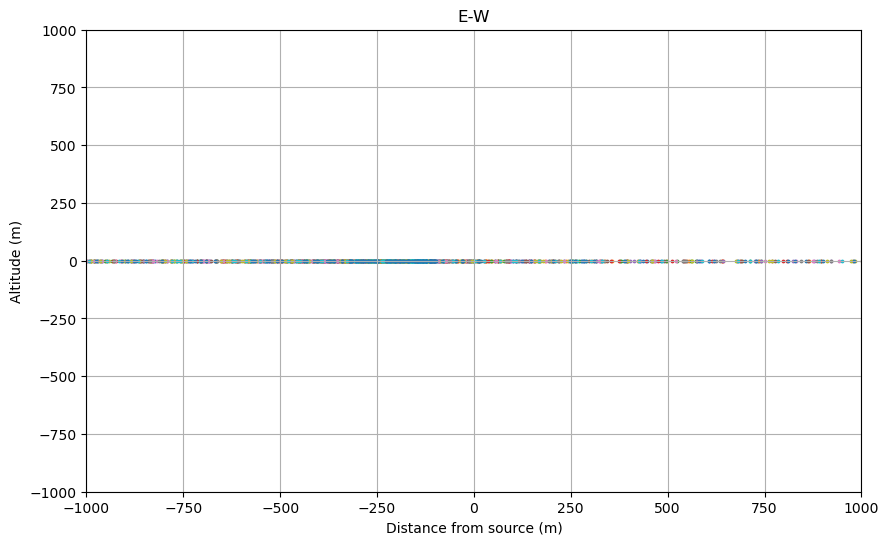

Mean: -361.5634264966867


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def find_discontinuity(points, threshold):
    for i in range(len(points)-1):
        if abs(points[i+1] - points[i]) > threshold:
            print(f'discontinuity at {i+1} , i: {points[i]},  i+1: {points[i+1]}') 
            low, high = points[i], points[i+1]
            return low, high
    return print('None')

threshold = 1000
SpeedOfSound = 343
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
df = df[df['phi'] != 0].reset_index(drop=True)
df = df[df['z']>=0]
df = df[(df['theta'] <= np.pi/2) & (df['theta']>= -np.pi/2)]

# Uncomment this line to observe the effect
# df['y'] = df['y'] - 500

group_t = df.groupby('time')

z_l = []

for t in df['time'].unique():
    if t != 0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'], df_['z'])
    
        for x0 in df_['y'].to_numpy():
            dz_dx = wave_eq.derivative()(x0)
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 65:
                z_l.append(wave_eq(x0))

z_values = np.unique(np.sort(z_l))
low, high = find_discontinuity(z_values, threshold)

time_delta = (high - low) / SpeedOfSound
min_time = np.min(df[(df['z'] > low) & (df['z'] < high)]['time'].unique())
max_time = min_time + time_delta
print(f"min_time: {min_time}, max_time: {max_time}")

wave_fronts = df[(df['time'] >= min_time) & (df['time'] <= max_time)]

group_t = wave_fronts.groupby('time')
plt.figure(figsize=(10, 6))

x_values = []
for t in wave_fronts['time'].unique():
    if t != 0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        wave_eq = CubicSpline(df_['y'], df_['z'])

        x_land = []
        y_land = []
        for x0 in df_['y'].to_numpy():
            dz_dx = wave_eq.derivative()(x0)
            if dz_dx != 0:
                n_slope = -1/dz_dx 
                land_x = x0 + wave_eq(x0) * dz_dx
                if np.abs(np.arctan(n_slope)) <= 20:
                    x_land.append(land_x)
                    y_land.append(0)
                    x_values.append(land_x)
        plt.scatter(x_land, y_land,s=3)

dist = 1000
plt.xlim((-dist, dist))
plt.ylim((-dist, dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.show()
print(f"Mean: {np.mean(x_values)}")

discontinuity at 4593 , i: 20677.9,  i+1: 24370.6
min_time: 69, max_time: 79.76588921282799


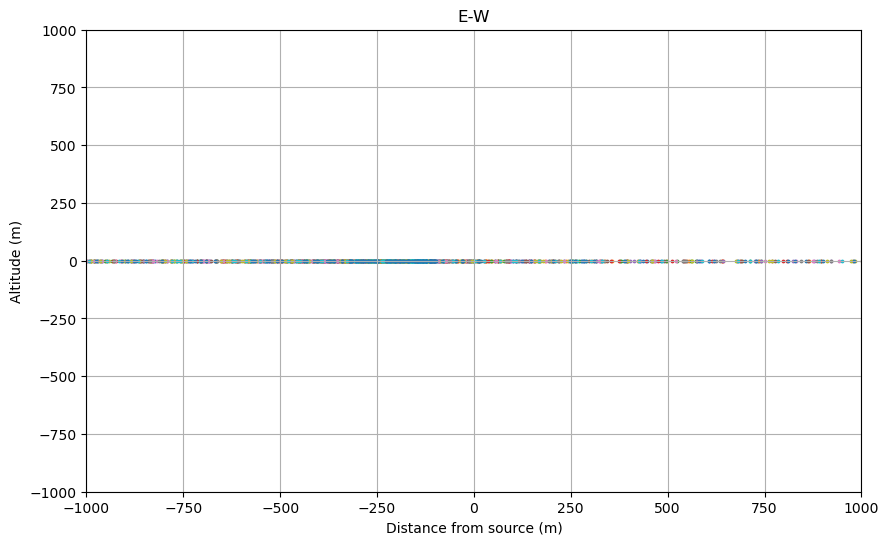

Mean: -361.5634264966867


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def find_discontinuity(points, threshold):
    for i in range(len(points)-1):
        if abs(points[i+1] - points[i]) > threshold:
            print(f'discontinuity at {i+1} , i: {points[i]},  i+1: {points[i+1]}') 
            low, high = points[i], points[i+1]
            return low, high
    return print('None')

threshold = 1000
SpeedOfSound = 343
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
df = df[df['phi'] != 0].reset_index(drop=True)
df = df[df['z']>=0]
df = df[(df['theta'] <= np.pi/2) & (df['theta']>= -np.pi/2)]

# Uncomment this line to observe the effect
# df['y'] = df['y'] - 500

group_t = df.groupby('time')

z_l = []

for t in df['time'].unique():
    if t != 0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'], df_['z'])
    
        for x0 in df_['y'].to_numpy():
            dz_dx = wave_eq.derivative()(x0)
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 65:
                z_l.append(wave_eq(x0))

z_values = np.unique(np.sort(z_l))
low, high = find_discontinuity(z_values, threshold)

time_delta = (high - low) / SpeedOfSound
min_time = np.min(df[(df['z'] > low) & (df['z'] < high)]['time'].unique())
max_time = min_time + time_delta
print(f"min_time: {min_time}, max_time: {max_time}")

wave_fronts = df[(df['time'] >= min_time) & (df['time'] <= max_time)]

group_t = wave_fronts.groupby('time')
plt.figure(figsize=(10, 6))

x_values = []
for t in wave_fronts['time'].unique():
    if t != 0:
        df_ = group_t.get_group(t).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        wave_eq = CubicSpline(df_['y'], df_['z'])

        x_land = []
        y_land = []
        for x0 in df_['y'].to_numpy():
            dz_dx = wave_eq.derivative()(x0)
            land_x = x0 + wave_eq(x0) * dz_dx
            x_land.append(land_x)
            y_land.append(0)
            x_values.append(land_x)
        plt.scatter(x_land, y_land,s=3)

dist = 1000
plt.xlim((-dist, dist))
plt.ylim((-dist, dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.show()
print(f"Mean: {np.mean(x_values)}")

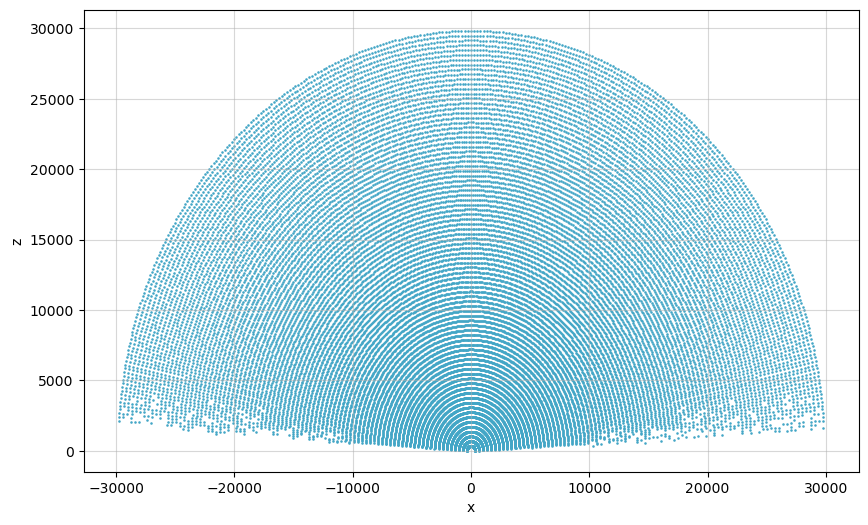

In [2]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_cnds_0.csv')

# df['x'] = df['x'] + 30
group_t = df.groupby('time')

plt.figure(figsize=(10, 6))

for t in df['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        
        wave_eq = CubicSpline(df_['x'],df_['z'], bc_type='natural')
        
        x_l = []
        y_l = []
        for x0 in df_['x'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        plt.scatter(x_l,y_l, s=0.7, color='#43A6C6')

plt.xlabel('x')
plt.ylabel('z')
plt.grid(alpha=0.5)
plt.show()


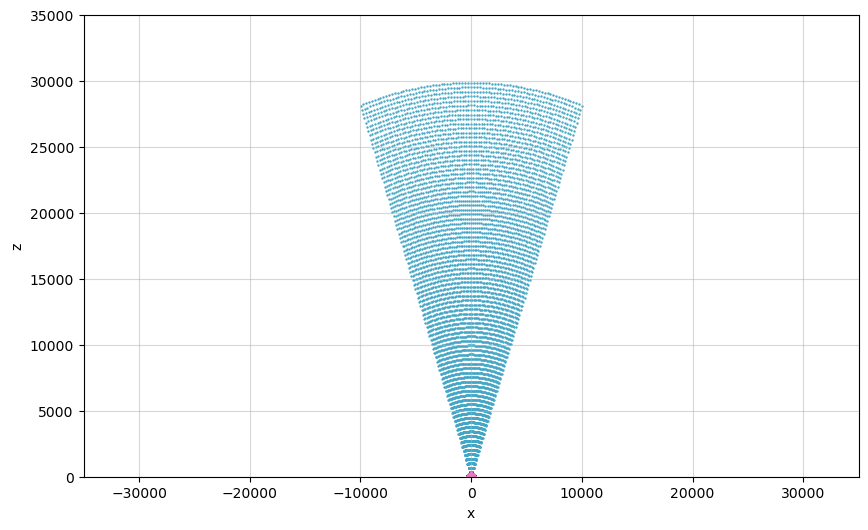

In [30]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/ideal_cnds_0.csv')
group_t = df.groupby('time')

plt.figure(figsize=(10, 6))

for t in df['time'].unique():
    if t!=0:
        df_ = group_t.get_group(t).sort_values('x')
        wave_eq = CubicSpline(df_['x'], df_['z'], bc_type='natural')
        
        x_l = []
        y_l = []
        x_w = []
        y_w = []
        for x0 in df_['x'].to_numpy():
            dz_dx = wave_eq.derivative()(x0)
            
            if dz_dx != 0:
                n_slope = np.rad2deg(np.arctan(-1 / dz_dx))
                
                # print(f"x0: {x0}, dz_dx: {dz_dx}, n_slope: {n_slope}")
                
                if np.abs(n_slope) >= 70:  # Temporarily relaxing the condition
                    land_x = x0 + wave_eq(x0) * dz_dx
                    x_w.append(x0)
                    y_w.append(wave_eq(x0))
                    x_l.append(land_x)
                    y_l.append(0)
        
        plt.scatter(x_w, y_w,s=0.5, color='#43A6C6')
        plt.scatter(x_l, y_l)

dist = 35 * 1000
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.xlabel('x')
plt.ylabel('z')
plt.grid(alpha=0.5)
plt.show()


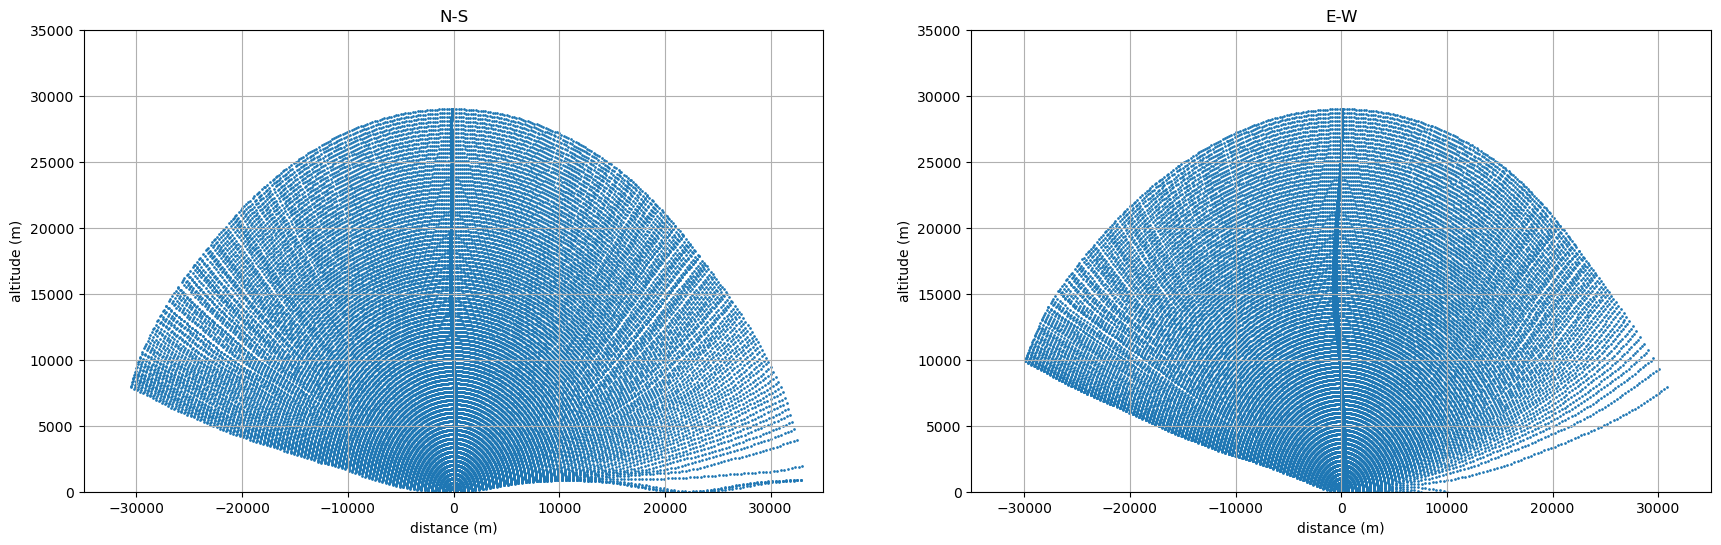

In [43]:
df = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
plt.figure(figsize=(21, 6))

plt.subplot(1,2,1)
plt.scatter(df['x'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.title('N-S')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df['y'],df['z'],s=0.9)

dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("distance (m)")
plt.ylabel("altitude (m)")
plt.title('E-W')
plt.grid()

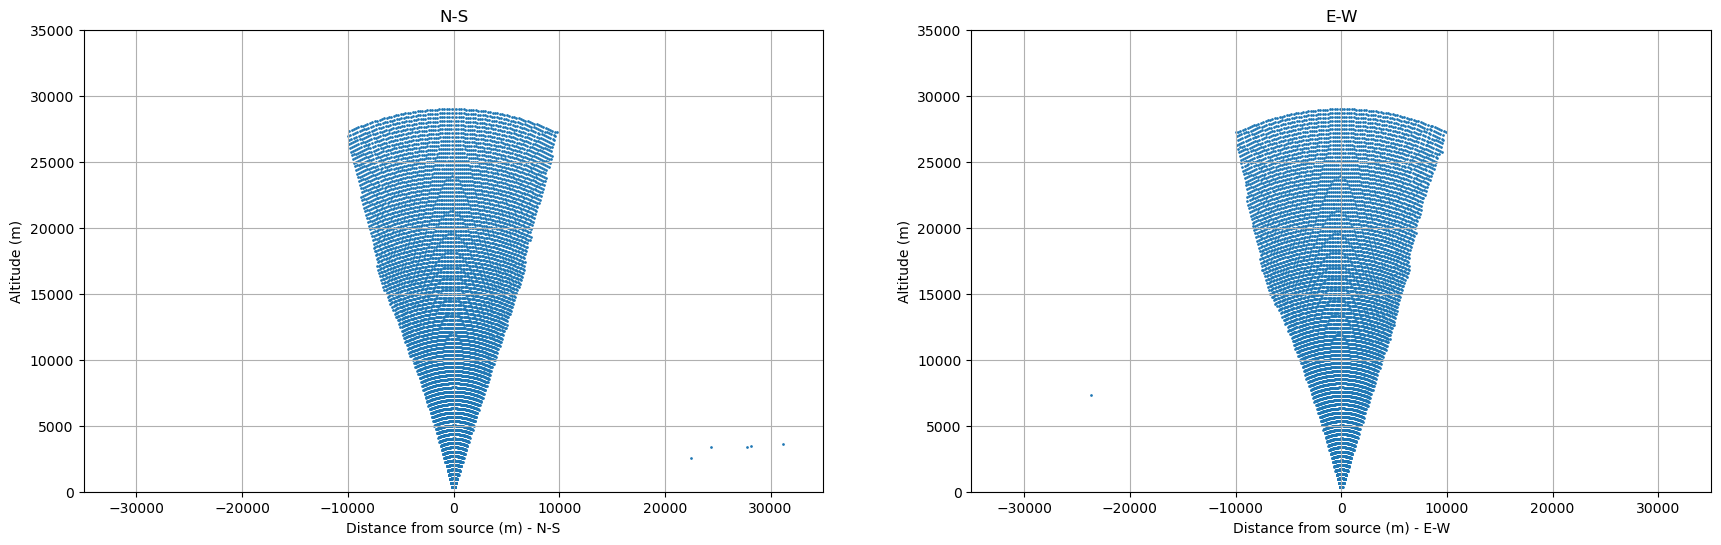

In [132]:
def plot_wave_fronts(df, axis, axis_label, subplot_idx):
    group_t = df.groupby('time')
    x_l = []
    y_l = []
    
    for t in df['time'].unique():
        if t != 0:
            df_ = group_t.get_group(t).sort_values(axis)
            df_ = df_.drop_duplicates(subset=axis)
            
            wave_eq = CubicSpline(df_[axis], df_['z'])
            
            for x0 in df_[axis].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))
                    
                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        # if np.abs(land_x) < 50:
                        x_l.append(x0)
                        y_l.append(wave_eq(x0))
    
    plt.subplot(1, 2, subplot_idx)
    plt.scatter(x_l, y_l, s=0.9)
    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel(axis_label)reflected_waves
    plt.ylabel("Altitude (m)")
    plt.grid()

# Load the data
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa = dfa[dfa['z'] >= 0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)]
dfa = dfa[dfa['phi'] >= 0]

dist = 35 * 1000

plt.figure(figsize=(21, 6))

# E-W plot
df_phi_non_zero = dfa[dfa['phi'] != 0].reset_index(drop=True)
plot_wave_fronts(df_phi_non_zero, 'y', 'Distance from source (m)', 2)
plt.title('E-W')

# N-S plot
df_phi_zero = dfa[dfa['phi'] == 0].reset_index(drop=True)
plot_wave_fronts(df_phi_zero, 'x', 'Distance from source (m) ', 1)
plt.title('N-S')
plt.show()

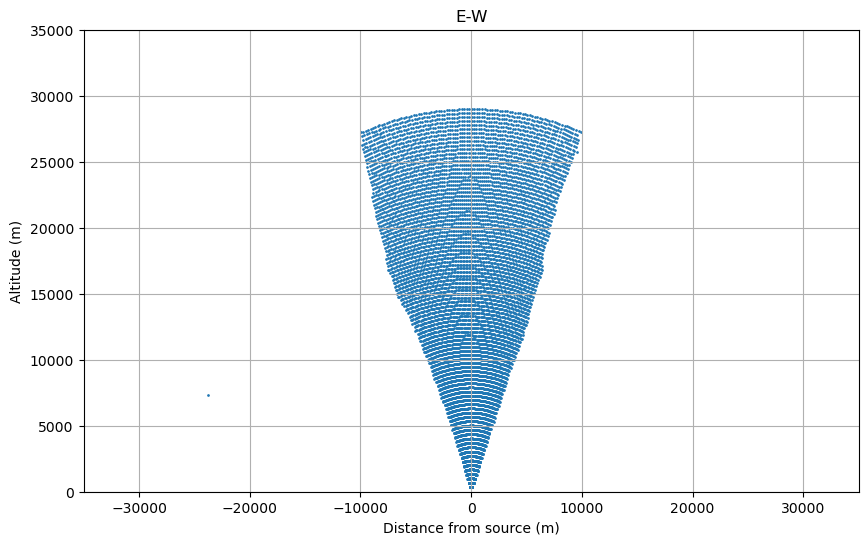

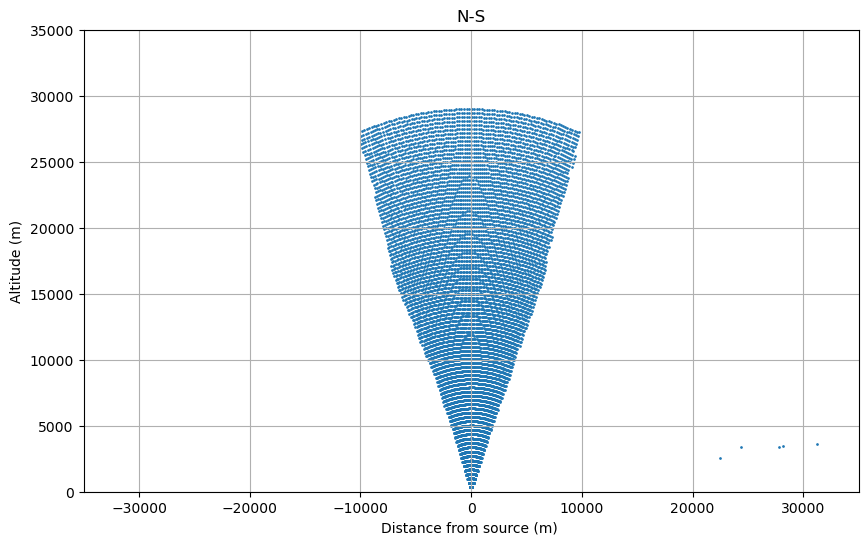

In [4]:
def plot_wave_fronts(df, axis, axis_label):
    group_t = df.groupby('time')
    x_l = []
    y_l = []
    
    for t in df['time'].unique():
        if t != 0:
            df_ = group_t.get_group(t).sort_values(axis)
            df_ = df_.drop_duplicates(subset=axis)
            
            wave_eq = CubicSpline(df_[axis], df_['z'])
            
            for x0 in df_[axis].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))
                    
                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        # if np.abs(land_x) < 50:
                        x_l.append(x0)
                        y_l.append(wave_eq(x0))
    
    plt.scatter(x_l, y_l, s=0.9)
    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel(axis_label)
    plt.ylabel("Altitude (m)")
    plt.grid()

# Load the data
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa = dfa[dfa['z'] >= 0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)]
dfa = dfa[dfa['phi'] >= 0]

dist = 35 * 1000

plt.figure(figsize=(10, 6))

# E-W plot
df_phi_non_zero = dfa[dfa['phi'] != 0].reset_index(drop=True)
plot_wave_fronts(df_phi_non_zero, 'y', 'Distance from source (m)')
plt.title('E-W')


plt.figure(figsize=(10, 6))
# N-S plot
df_phi_zero = dfa[dfa['phi'] == 0].reset_index(drop=True)
plot_wave_fronts(df_phi_zero, 'x', 'Distance from source (m) ')
plt.title('N-S')
plt.show()

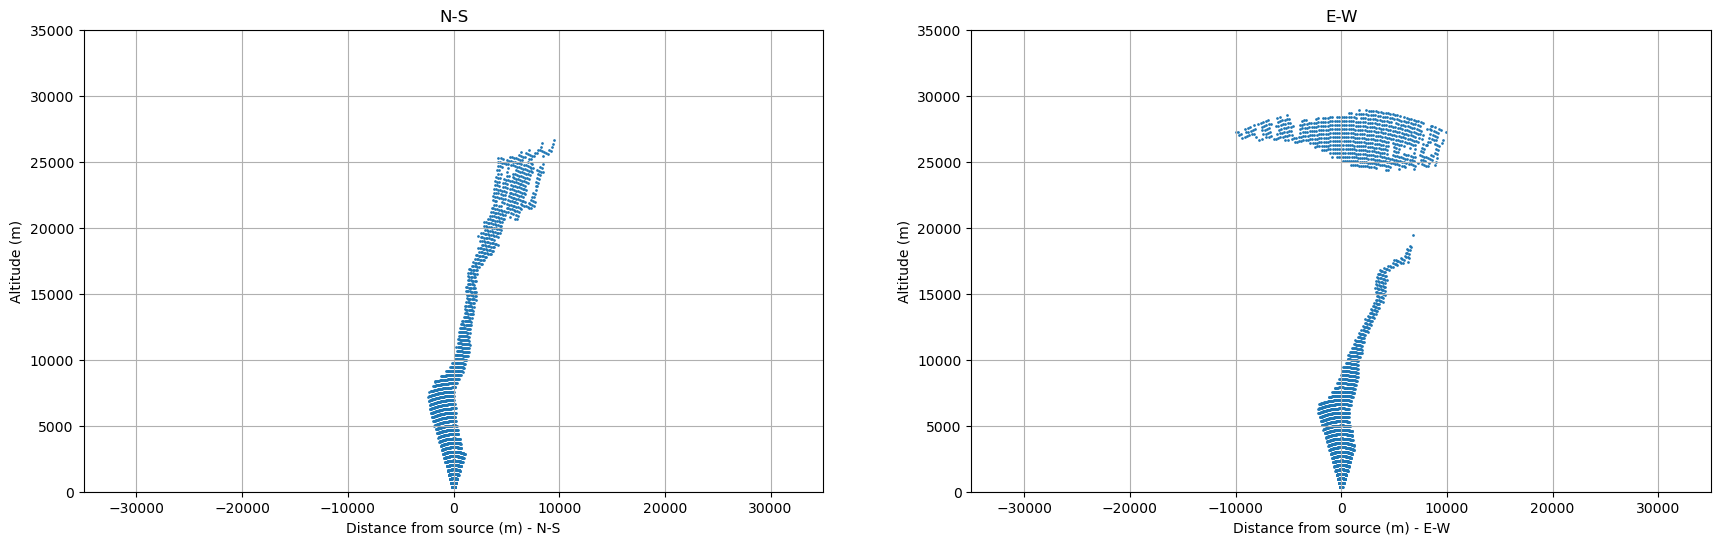

In [5]:
def plot_wave_fronts(df, axis, axis_label, subplot_idx):
    group_t = df.groupby('time')
    x_l = []
    y_l = []
    
    for t in df['time'].unique():
        if t != 0:
            df_ = group_t.get_group(t).sort_values(axis)
            df_ = df_.drop_duplicates(subset=axis)
            
            wave_eq = CubicSpline(df_[axis], df_['z'])
            
            for x0 in df_[axis].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))
                    
                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        if np.abs(land_x) < 50:
                            x_l.append(x0)
                            y_l.append(wave_eq(x0))
    
    plt.subplot(1, 2, subplot_idx)
    plt.scatter(x_l, y_l, s=0.9)
    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel(axis_label)
    plt.ylabel("Altitude (m)")
    plt.grid()

# Load the data
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa = dfa[dfa['z'] >= 0]
dfa = dfa[(dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)]
dfa = dfa[dfa['phi'] >= 0]

dist = 35 * 1000

plt.figure(figsize=(21, 6))

# E-W plot
df_phi_non_zero = dfa[dfa['phi'] != 0].reset_index(drop=True)
plot_wave_fronts(df_phi_non_zero, 'y', 'Distance from source (m) - E-W', 2)
plt.title('E-W')

# N-S plot
df_phi_zero = dfa[dfa['phi'] == 0].reset_index(drop=True)
plot_wave_fronts(df_phi_zero, 'x', 'Distance from source (m) - N-S', 1)
plt.title('N-S')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


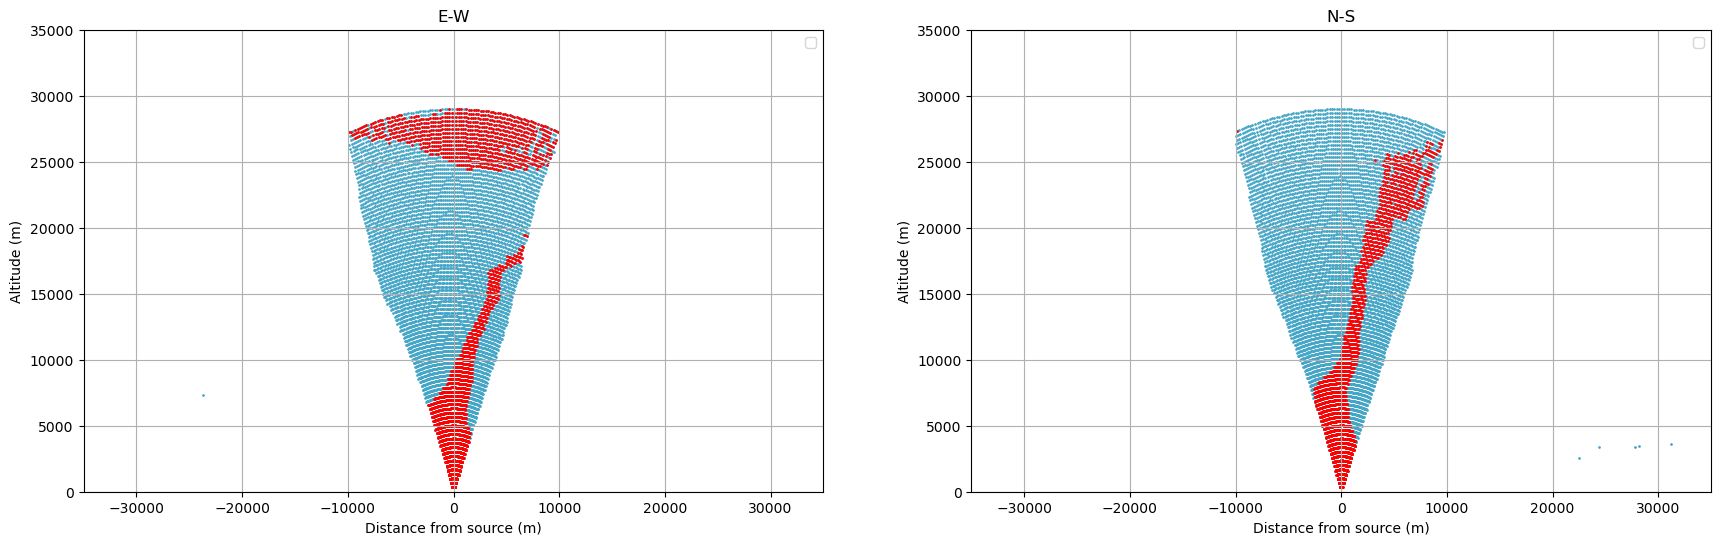

In [15]:
def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title):
    group_t = dfa.groupby('time')

    for t in dfa['time'].unique():
        if t != 0:
            df_ = group_t.get_group(t).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
            wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

            wi, land_wi = [], []

            for i in range(df_.shape[0]):
                x0 = df_.loc[i, dist_axis]
                dz_dx = wave_eq.derivative()(x0)
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        wi.append(i)

                        if np.abs(land_x) <= 65:
                            land_wi.append(i)

            plt.subplot(1, 2, subplot_position)
            plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
            plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')

    dist = 1000 * 35

    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title(title)
    # plt.legend()
    plt.grid()

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
plt.figure(figsize=(21, 6))

dfa_ew = dfa_ew[(dfa_ew['phi'] != 0) & (dfa_ew['z'] >= 0) & (dfa_ew['theta'] <= np.pi/2) & (dfa_ew['theta'] >= -np.pi/2) & (dfa_ew['phi'] >= 0)].reset_index(drop=True)
process_and_plot(dfa_ew, 'y', 'z', 1, 'E-W')

dfa_ns = dfa[(dfa['phi'] == 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2) & (dfa['phi'] >= 0)].reset_index(drop=True)
process_and_plot(dfa_ns, 'x', 'z', 2, 'N-S')

plt.show()

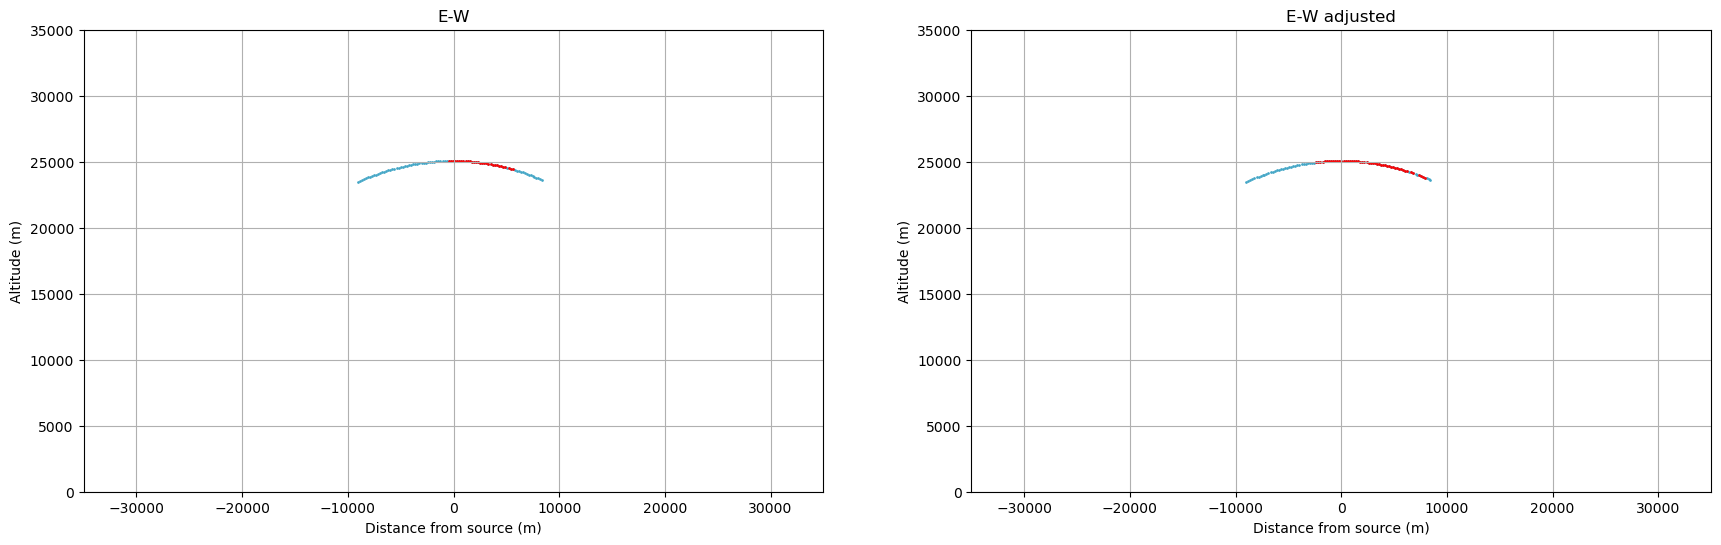

In [5]:
def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

def window_points(xi, window_size, top_no_of_windows):
    top_windows, midpt_windows = [], []
    x_l_sorted = np.sort(xi)
    
    for i in range(len(x_l_sorted)):
        window_start = x_l_sorted[i]
        window_end = window_start + window_size
        
        count_points = count_points_in_window(window_start, window_end, x_l_sorted)
    
        if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
            top_windows.append((window_start, window_end, count_points))
            midpt_windows.append((window_start+window_end)/2)

    top_windows, midpt_windows = zip(*sorted(zip(top_windows, midpt_windows), key=lambda x: x[0][2], reverse=True))
    top_windows = top_windows[:top_no_of_windows]
    midpt_windows = midpt_windows[:top_no_of_windows]

    return top_windows, midpt_windows
    
def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title, time_slice):
    group_t = dfa.groupby('time')
    
    # Check if the requested time_slice exists in the data
    if time_slice not in group_t.groups:
        print(f"Time slice {time_slice} not found in the data.")
        return
    
    df_ = group_t.get_group(time_slice).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
    wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

    wi, land_wi = [], []
    xi, land_xi = [], []

    for i in range(df_.shape[0]):
        x0 = df_.loc[i, dist_axis]
        dz_dx = wave_eq.derivative()(x0)
        if dz_dx != 0:
            n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

            if np.abs(n_slope) >= 70:
                land_x = x0 + wave_eq(x0) * dz_dx
                wi.append(i)
                xi.append(land_x)
                
                if np.abs(land_x) <= 65:
                    land_wi.append(i)
                    land_xi.append(land_x)

    plt.subplot(1, 2, subplot_position)
    plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
    plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')

    dist = 1000 * 35

    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title(title)
    plt.grid()

    return xi, land_xi

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)

plt.figure(figsize=(21, 6))
time_slice = 83
dist_axis, altitude_axis = 'y', 'z'
window_size = 130
top_no_of_windows = 10

xi, land_xi = process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, 'E-W', time_slice)
top_windows, midpt_windows = window_points(xi,window_size,top_no_of_windows)

# for i, (start, end, count) in enumerate(top_windows):
#     print(f"Number of points in this window: {count} at centre: {(start + end)/2}:: midpoint{midpt_windows[i]}\n")

dfa_ew[dist_axis] = dfa_ew[dist_axis] - midpt_windows[0]
process_and_plot(dfa_ew, dist_axis, altitude_axis, 2, 'E-W adjusted', time_slice)
plt.show()

In [6]:
top_windows

((-134.86331449616137, -4.863314496161365, 51),
 (-142.87446513454643, -12.874465134546426, 42),
 (-162.68604318660527, -32.686043186605275, 34),
 (-180.99836292713553, -50.99836292713553, 33),
 (-197.5769160699915, -67.57691606999151, 32),
 (-214.7090676197031, -84.70906761970309, 27),
 (-235.85896953560768, -105.85896953560768, 22),
 (-254.76264628468925, -124.76264628468925, 20),
 (-282.09809542266976, -152.09809542266976, 19),
 (-295.1845248731752, -165.18452487317518, 17))

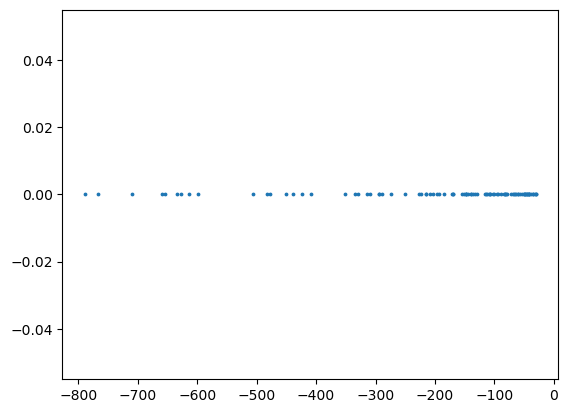

In [21]:
plt.scatter(xi,np.zeros(len(xi)),s=3)

In [23]:
midpt_windows

(-89.68562238156846,
 -106.86484945905386,
 -119.12219034966756,
 -129.03629848611672,
 -142.83824834714233,
 -149.61019765332458,
 -162.0972539692848,
 -185.5962386714682,
 -209.37710011242143,
 -229.90146192841166)

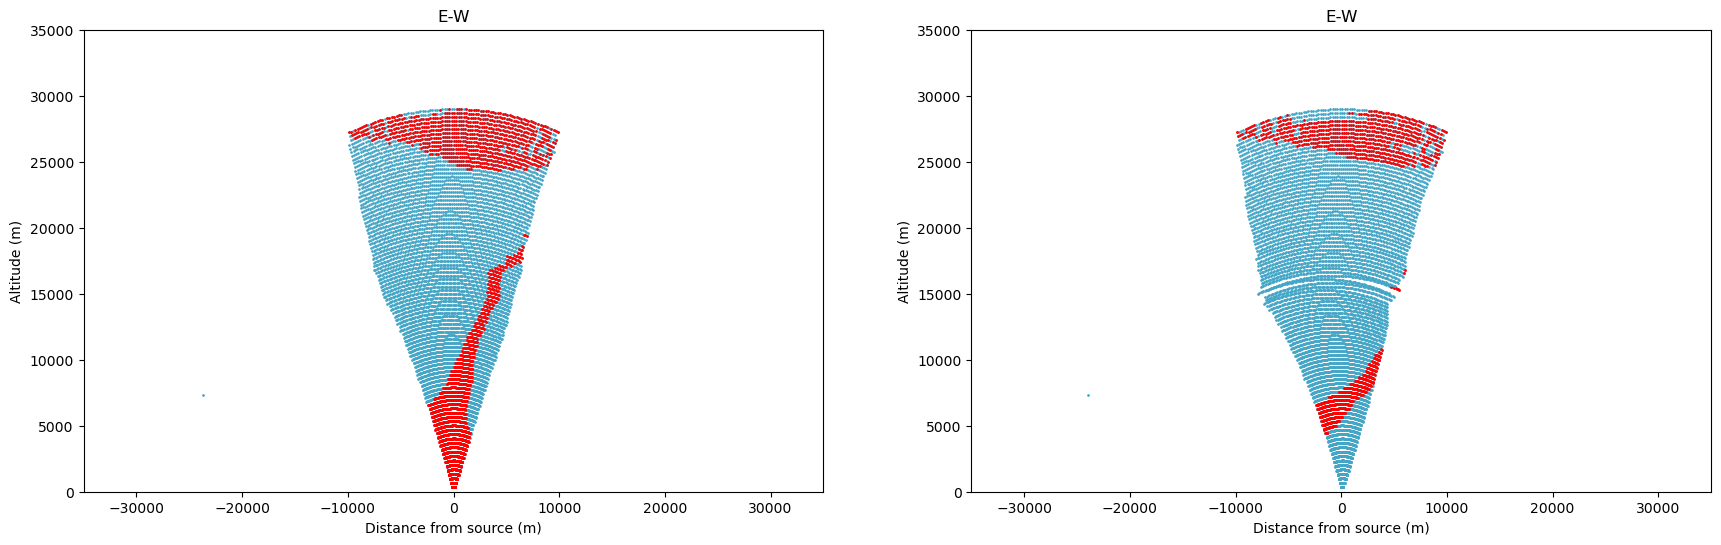

In [107]:
def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

def window_points(xi, window_size, top_no_of_windows):
    top_windows, midpt_windows = [], []
    x_l_sorted = np.sort(xi)
    
    for i in range(len(x_l_sorted)):
        window_start = x_l_sorted[i]
        window_end = window_start + window_size
        
        count_points = count_points_in_window(window_start, window_end, x_l_sorted)
    
        if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
            top_windows.append((window_start, window_end, count_points))
            midpt_windows.append((window_start+window_end)/2)

    top_windows, midpt_windows = zip(*sorted(zip(top_windows, midpt_windows), key=lambda x: x[0][2], reverse=True))
    top_windows = top_windows[:top_no_of_windows]
    midpt_windows = midpt_windows[:top_no_of_windows]

    return top_windows, midpt_windows
    
def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title, time_slice):
    group_t = dfa.groupby('time')
    
    # Check if the requested time_slice exists in the data
    if time_slice not in group_t.groups:
        print(f"Time slice {time_slice} not found in the data.")
        return
    
    df_ = group_t.get_group(time_slice).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
    wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

    wi, land_wi = [], []
    xi, land_xi = [], []

    for i in range(df_.shape[0]):
        x0 = df_.loc[i, dist_axis]
        dz_dx = wave_eq.derivative()(x0)
        if dz_dx != 0:
            n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

            if np.abs(n_slope) >= 70:
                land_x = x0 + wave_eq(x0) * dz_dx
                wi.append(i)
                xi.append(land_x)
                
                if np.abs(land_x) <= 65:
                    land_wi.append(i)
                    land_xi.append(land_x)

    plt.subplot(1, 2, subplot_position)
    plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
    plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')

    dist = 1000 * 35

    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title(title)
    plt.grid()

    return xi, land_xi

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)

plt.figure(figsize=(21, 6))
time_slice = 32
dist_axis, altitude_axis = 'y', 'z'
window_size = 130
top_no_of_windows = 10

for time_slice in dfa_ew['time'].unique():
    if time_slice != 0:
        
        xi, land_xi = process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, 'E-W', time_slice)
        top_windows, midpt_windows = window_points(xi,window_size,top_no_of_windows)
        df_n = dfa_ew.copy()
        df_n[dist_axis] = df_n[dist_axis] + midpt_windows[0]
        xi, land_xi = process_and_plot(df_n, dist_axis, altitude_axis, 2, 'E-W', time_slice)

plt.show()

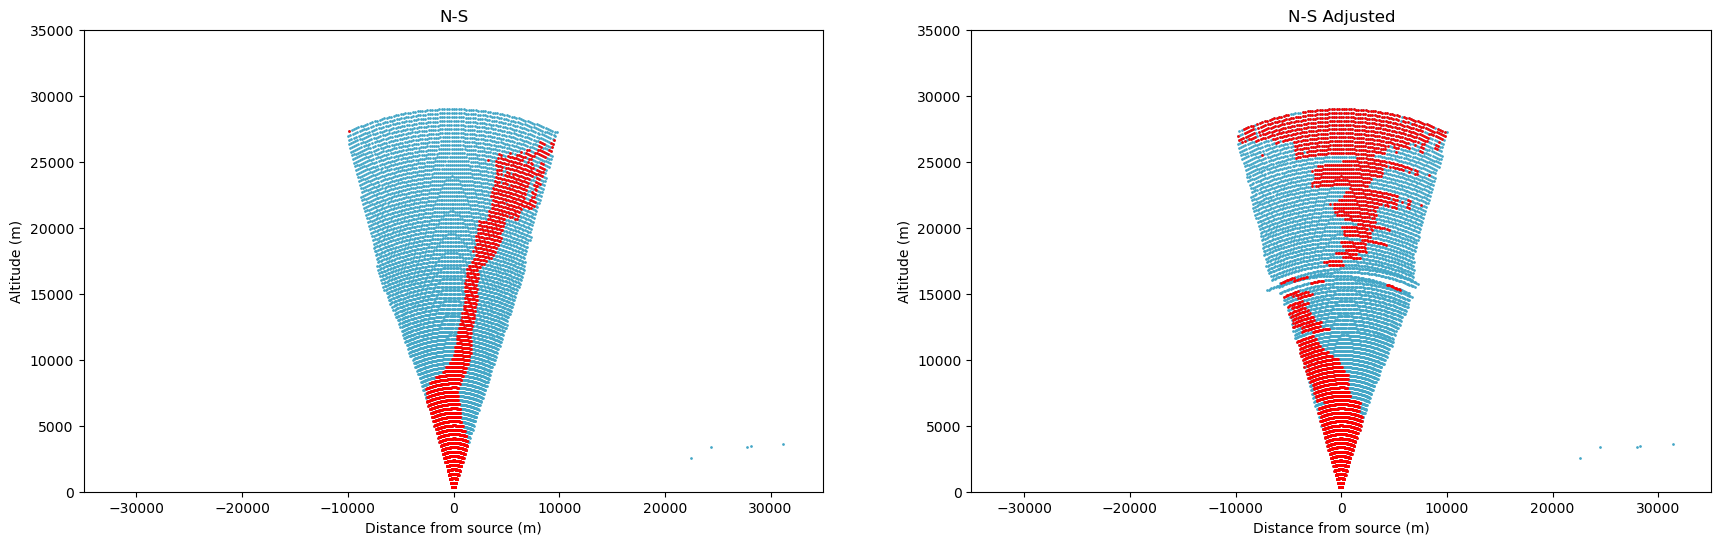

In [27]:
def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

def window_points(xi, window_size, top_no_of_windows):
    top_windows, midpt_windows = [], []
    x_l_sorted = np.sort(xi)
    
    for i in range(len(x_l_sorted)):
        window_start = x_l_sorted[i]
        window_end = window_start + window_size
        
        count_points = count_points_in_window(window_start, window_end, x_l_sorted)
    
        if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
            top_windows.append((window_start, window_end, count_points))
            midpt_windows.append((window_start + window_end) / 2)

    top_windows, midpt_windows = zip(*sorted(zip(top_windows, midpt_windows), key=lambda x: x[0][2], reverse=True))
    top_windows = top_windows[:top_no_of_windows]
    midpt_windows = midpt_windows[:top_no_of_windows]

    return top_windows, midpt_windows

def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title, time_slice):
    group_t = dfa.groupby('time')
    
    if time_slice not in group_t.groups:
        print(f"Time slice {time_slice} not found in the data.")
        return None, None
    
    df_ = group_t.get_group(time_slice).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
    wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

    wi, land_wi = [], []
    xi, land_xi = [], []

    for i in range(df_.shape[0]):
        x0 = df_.loc[i, dist_axis]
        dz_dx = wave_eq.derivative()(x0)
        if dz_dx != 0:
            n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

            if np.abs(n_slope) >= 70:
                land_x = x0 + wave_eq(x0) * dz_dx
                wi.append(i)
                xi.append(land_x)
                
                if np.abs(land_x) <= 65:
                    land_wi.append(i)
                    land_xi.append(land_x)

    plt.subplot(1, 2, subplot_position)
    plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
    plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')

    dist = 1000 * 35

    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title(title)
    plt.grid()

    return xi, land_xi

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
dfa_ns = dfa[(dfa['phi'] == 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)

plt.figure(figsize=(21, 6))
dist_axis_x, dist_axis_y, altitude_axis = 'x','y', 'z'
window_size = 130
top_no_of_windows = 10

acoustic_source_loc = []

for time_slice in dfa_ew['time'].unique():
    if time_slice != 0:
        # xi, land_xi = process_and_plot(dfa_ew, dist_axis_y, altitude_axis, 1, 'E-W', time_slice)
        
        # if xi is not None:
        #     top_windows, midpt_windows = window_points(xi, window_size, top_no_of_windows)
            
        #     if top_windows:
        #         df_n = dfa_ew.copy()
        #         acoustic_source_loc.append(midpt_windows[0])
        #         df_n[dist_axis_y] = df_n[dist_axis_y] - midpt_windows[0]  
        #         process_and_plot(df_n, dist_axis_y, altitude_axis, 2, 'E-W Adjusted', time_slice)
                
        xi, land_xi = process_and_plot(dfa_ns, dist_axis_x, altitude_axis, 1, 'N-S', time_slice)
        
        if xi is not None:
            top_windows, midpt_windows = window_points(xi, window_size, top_no_of_windows)
        
            if top_windows:
                df_n = dfa_ns.copy()
                acoustic_source_loc.append(midpt_windows[0])
                df_n[dist_axis_x] = df_n[dist_axis_x] - midpt_windows[0]  
                process_and_plot(df_n, dist_axis_x, altitude_axis, 2, 'N-S Adjusted', time_slice)
                
plt.show()

96


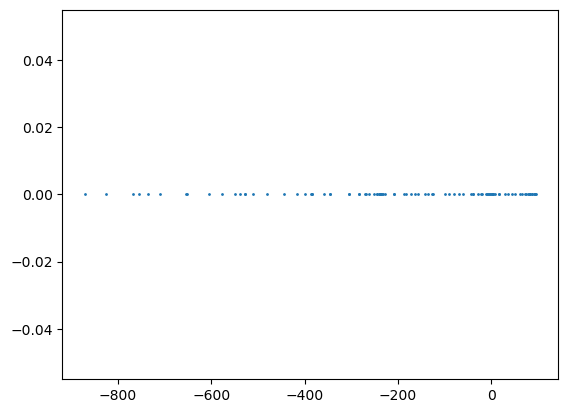

In [37]:
print(len(acoustic_source_loc))
plt.scatter(acoustic_source_loc,np.zeros(len(acoustic_source_loc)),s=1)
plt.show()

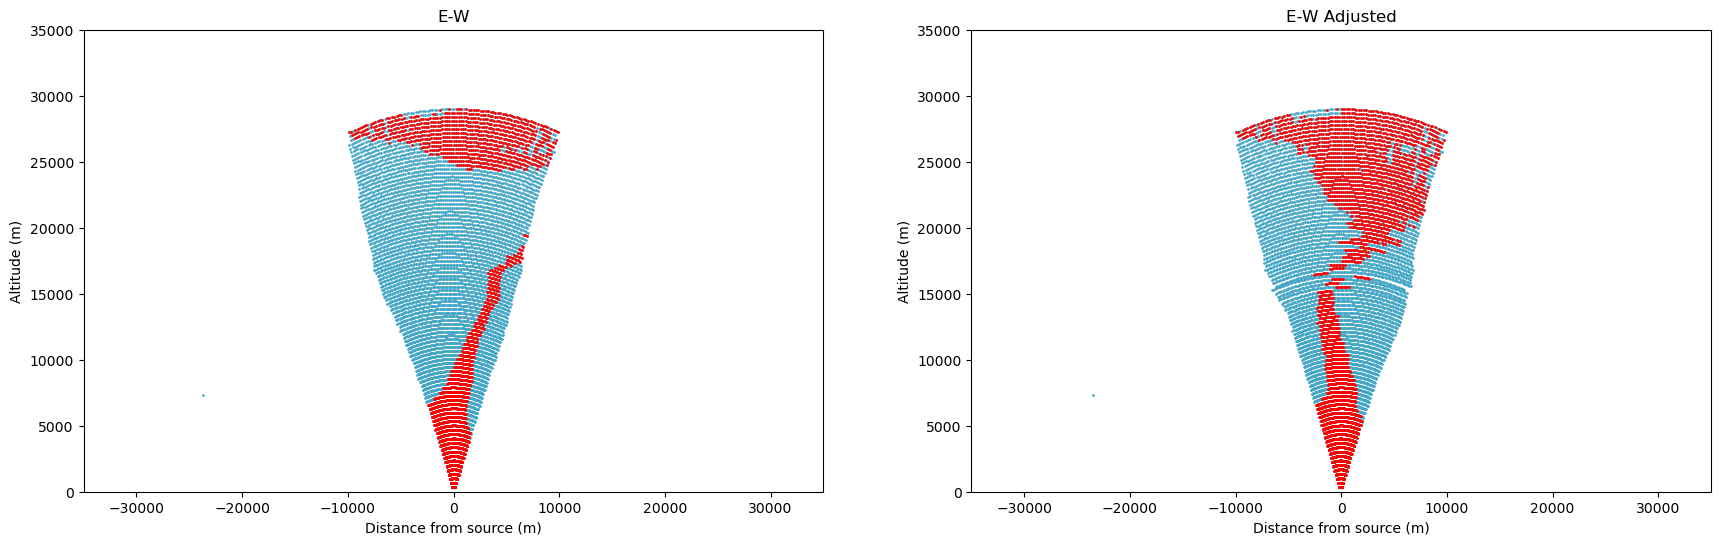

In [10]:
def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

def window_points(xi, window_size, top_no_of_windows):
    top_windows, midpt_windows = [], []
    x_l_sorted = np.sort(xi)
    
    for i in range(len(x_l_sorted)):
        window_start = x_l_sorted[i]
        window_end = window_start + window_size
        
        count_points = count_points_in_window(window_start, window_end, x_l_sorted)
    
        if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
            top_windows.append((window_start, window_end, count_points))
            midpt_windows.append((window_start + window_end) / 2)

    top_windows, midpt_windows = zip(*sorted(zip(top_windows, midpt_windows), key=lambda x: x[0][2], reverse=True))
    top_windows = top_windows[:top_no_of_windows]
    midpt_windows = midpt_windows[:top_no_of_windows]

    return top_windows, midpt_windows

def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title, time_slice):
    group_t = dfa.groupby('time')
    
    if time_slice not in group_t.groups:
        print(f"Time slice {time_slice} not found in the data.")
        return None, None
    
    df_ = group_t.get_group(time_slice).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
    wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

    wi, land_wi = [], []
    xi, land_xi = [], []

    for i in range(df_.shape[0]):
        x0 = df_.loc[i, dist_axis]
        dz_dx = wave_eq.derivative()(x0)
        if dz_dx != 0:
            n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

            if np.abs(n_slope) >= 70:
                land_x = x0 + wave_eq(x0) * dz_dx
                wi.append(i)
                xi.append(land_x)
                
                if np.abs(land_x) <= 65:
                    land_wi.append(i)
                    land_xi.append(land_x)

    plt.subplot(1, 2, subplot_position)
    plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
    plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')

    dist = 1000 * 35

    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title(title)
    plt.grid()
    
    return xi, land_xi
    
def find_nearest_location(locations, current_loc):
    distances = np.abs(np.array(locations) - current_loc)
    nearest_index = np.argmin(distances)
    return locations[nearest_index]

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)

plt.figure(figsize=(21, 6))
dist_axis, altitude_axis = 'y', 'z'
window_size = 130
top_no_of_windows = 25

acoustic_source_loc = []
initial_loc = 0 

for time_slice in dfa_ew['time'].unique():
    if time_slice != 0:
        xi, land_xi = process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, 'E-W', time_slice)
        
        if xi is not None:
            top_windows, midpt_windows = window_points(xi, window_size, top_no_of_windows)
            
            if top_windows:
                nearest_loc = find_nearest_location(midpt_windows, initial_loc)
                acoustic_source_loc.append(nearest_loc)
                df_n = dfa_ew.copy()
                df_n[dist_axis] = df_n[dist_axis] - nearest_loc
                process_and_plot(df_n, dist_axis, altitude_axis, 2, 'E-W Adjusted', time_slice)
                
plt.show()

96


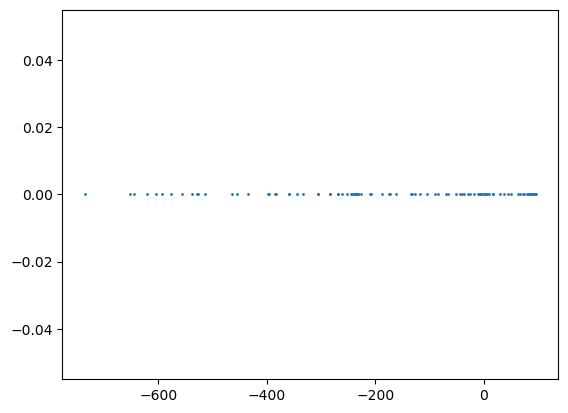

In [13]:
print(len(acoustic_source_loc))
plt.scatter(acoustic_source_loc,np.zeros(len(acoustic_source_loc)),s=1)
plt.show()

Cluster centers: [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732] 



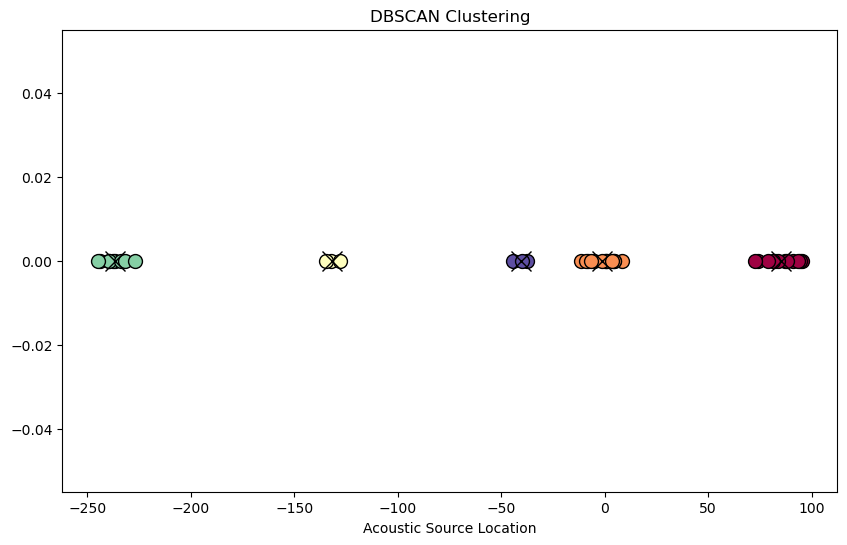

In [12]:
acoustic_source_loc = np.array(acoustic_source_loc).reshape(-1, 1)

eps = 5
min_samples = 3

db = DBSCAN(eps=eps,min_samples=min_samples).fit(acoustic_source_loc) 
labels = db.labels_

unique_labels = set(labels)
unique_labels.discard(-1)

cluster_centers = []

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = acoustic_source_loc[class_member_mask]
    cluster_center = np.mean(xy)
    cluster_centers.append(cluster_center)

print(f'Cluster centers: {cluster_centers} \n')

plt.figure(figsize=(10, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = acoustic_source_loc[class_member_mask]
    plt.plot(xy, np.zeros_like(xy), 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

for center in cluster_centers:
    plt.plot(center, 0, 'x', markerfacecolor='black', markeredgecolor='k', markersize=15)

plt.title('DBSCAN Clustering')
plt.xlabel('Acoustic Source Location')
plt.show()

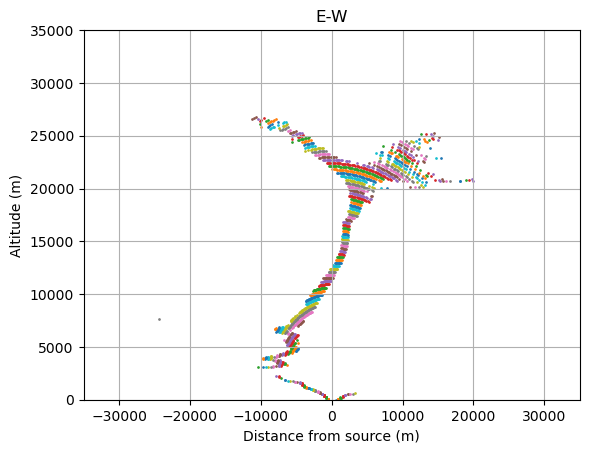

In [13]:
center = - 236.67566058151388
dfa_ew_n = dfa_ew.copy()
dfa_ew_n['y'] = dfa_ew_n['y'] - center
group_t = dfa_ew_n.groupby('time')

for time_slice in dfa['time'].unique():
    if time_slice!=0:  
        df_ = group_t.get_group(time_slice).sort_values('y')
        df_ = df_.drop_duplicates(subset='y')
        
        wave_eq = CubicSpline(df_['y'],df_['z'])
        
        x_l = []
        y_l = []
        for x0 in df_['y'].to_numpy():
            
            dz_dx = wave_eq.derivative()(x0)
        
            land_x = x0 + wave_eq(x0) * dz_dx
            if np.abs(land_x) < 50:
                x_l.append(x0)
                y_l.append(wave_eq(x0))
        
        
        plt.scatter(x_l,y_l, s=0.9)
        
dist = 35 * 1000
plt.xlim((-dist,dist))
plt.ylim((0,dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.show()

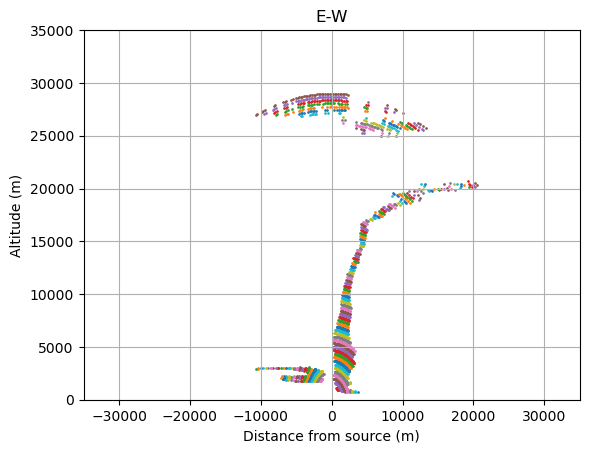

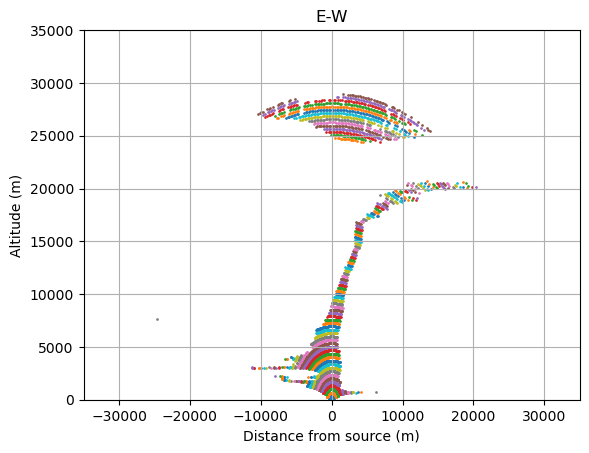

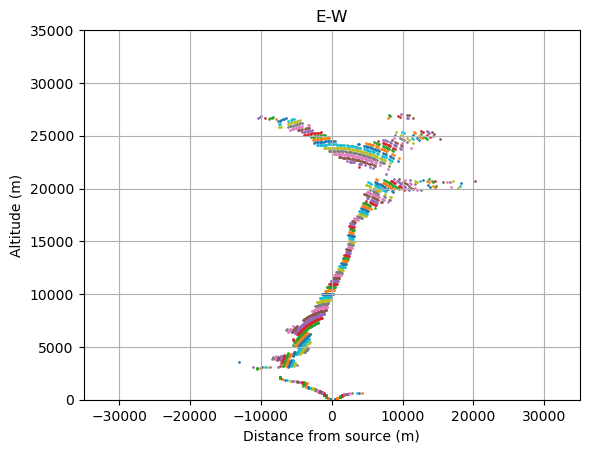

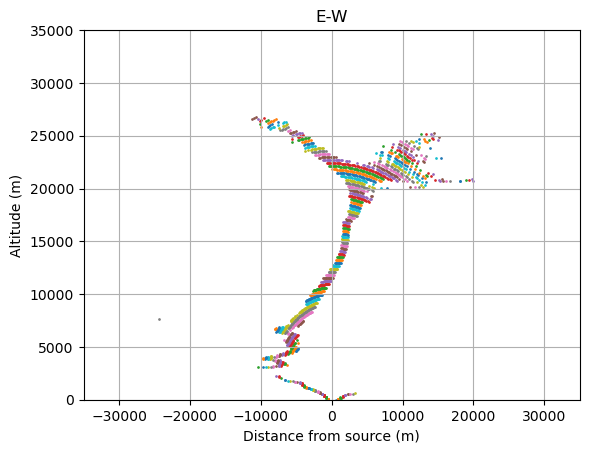

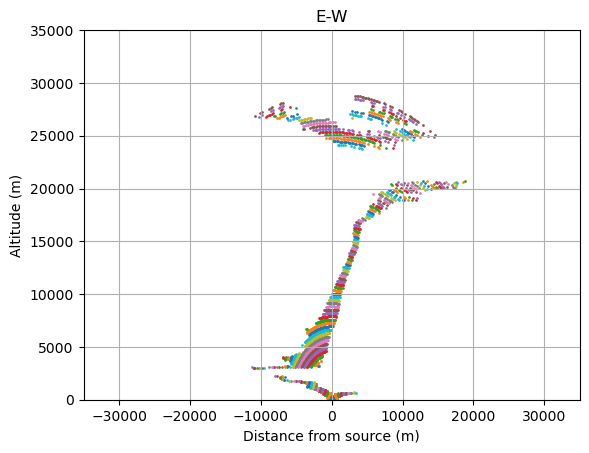

In [16]:
# center = - 236.67566058151388

for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] = dfa_ew_n['y'] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice!=0:  
            df_ = group_t.get_group(time_slice).sort_values('y')
            df_ = df_.drop_duplicates(subset='y')
            
            wave_eq = CubicSpline(df_['y'],df_['z'])
            
            x_l = []
            y_l = []
            for x0 in df_['y'].to_numpy():
                
                dz_dx = wave_eq.derivative()(x0)
            
                land_x = x0 + wave_eq(x0) * dz_dx
                if np.abs(land_x) < 50:
                    x_l.append(x0)
                    y_l.append(wave_eq(x0))
            
            
            plt.scatter(x_l,y_l, s=0.9)
    
    dist = 35 * 1000
    plt.xlim((-dist,dist))
    plt.ylim((0,dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title('E-W')
    plt.grid()
    plt.show()
# plt.show()

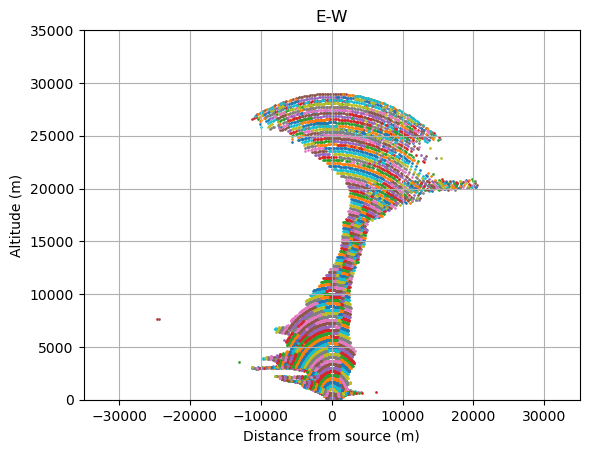

In [17]:
for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] = dfa_ew_n['y'] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice!=0:  
            df_ = group_t.get_group(time_slice).sort_values('y')
            df_ = df_.drop_duplicates(subset='y')
            wave_eq = CubicSpline(df_['y'],df_['z'])
            
            x_l = []
            y_l = []
            for x0 in df_['y'].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
            
                land_x = x0 + wave_eq(x0) * dz_dx
                if np.abs(land_x) < 50:
                    x_l.append(x0)
                    y_l.append(wave_eq(x0))
            
            plt.scatter(x_l,y_l, s=0.9)
    
    dist = 35 * 1000
    plt.xlim((-dist,dist))
    plt.ylim((0,dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title('E-W')
    plt.grid()

plt.show()

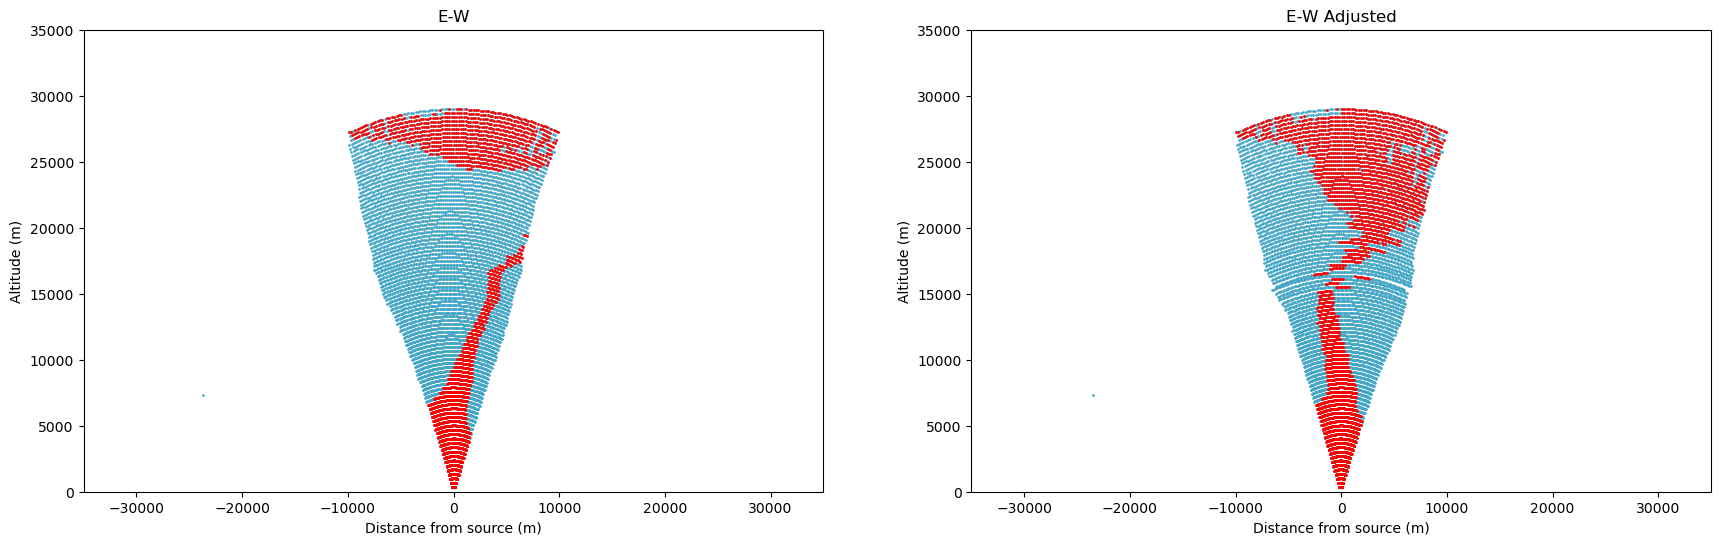


Cluster centers: [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]



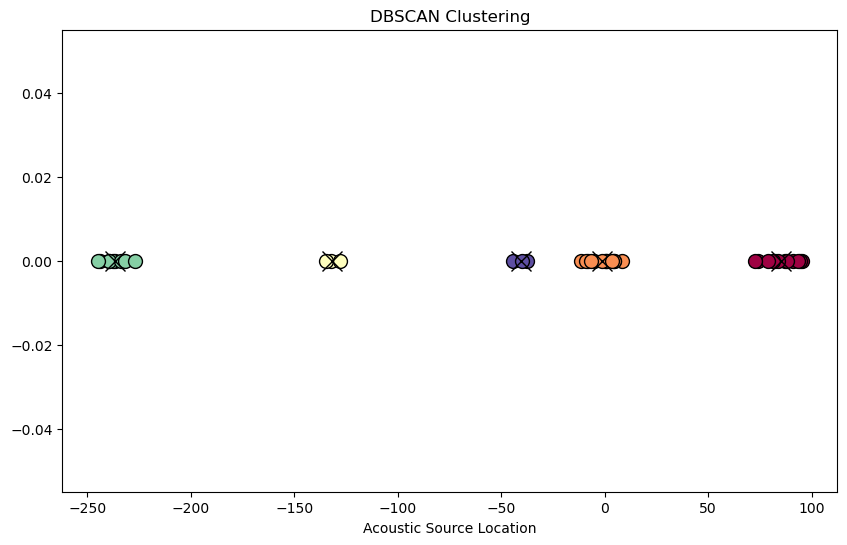

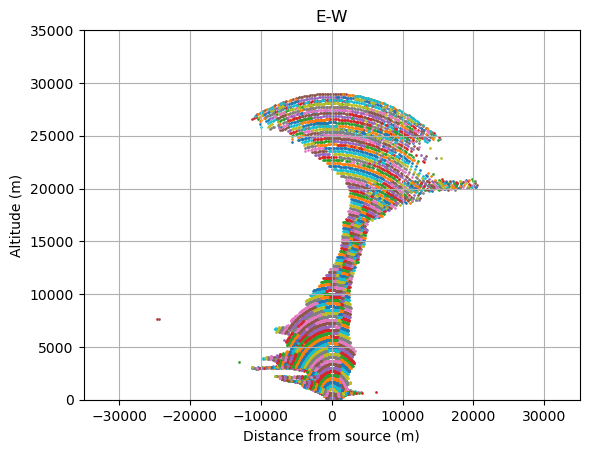

In [3]:
def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

def window_points(xi, window_size, top_no_of_windows):
    top_windows, midpt_windows = [], []
    x_l_sorted = np.sort(xi)
    
    for i in range(len(x_l_sorted)):
        window_start = x_l_sorted[i]
        window_end = window_start + window_size
        
        count_points = count_points_in_window(window_start, window_end, x_l_sorted)
    
        if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
            top_windows.append((window_start, window_end, count_points))
            midpt_windows.append((window_start + window_end) / 2)

    top_windows, midpt_windows = zip(*sorted(zip(top_windows, midpt_windows), key=lambda x: x[0][2], reverse=True))
    top_windows = top_windows[:top_no_of_windows]
    midpt_windows = midpt_windows[:top_no_of_windows]

    return top_windows, midpt_windows

def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title, time_slice):
    group_t = dfa.groupby('time')
    
    if time_slice not in group_t.groups:
        print(f"Time slice {time_slice} not found in the data.")
        return None, None
    
    df_ = group_t.get_group(time_slice).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
    wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

    wi, land_wi = [], []
    xi, land_xi = [], []

    for i in range(df_.shape[0]):
        x0 = df_.loc[i, dist_axis]
        dz_dx = wave_eq.derivative()(x0)
        if dz_dx != 0:
            n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

            if np.abs(n_slope) >= 70:
                land_x = x0 + wave_eq(x0) * dz_dx
                wi.append(i)
                xi.append(land_x)
                
                if np.abs(land_x) <= 65:
                    land_wi.append(i)
                    land_xi.append(land_x)

    plt.subplot(1, 2, subplot_position)
    plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
    plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')

    dist = 1000 * 35

    plt.xlim((-dist, dist))
    plt.ylim((0, dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title(title)
    plt.grid()
    
    return xi, land_xi
    
def find_nearest_location(locations, current_loc):
    distances = np.abs(np.array(locations) - current_loc)
    nearest_index = np.argmin(distances)
    return locations[nearest_index]

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)

plt.figure(figsize=(21, 6))
dist_axis, altitude_axis = 'y', 'z'
window_size = 130
top_no_of_windows = 25

acoustic_source_loc = []
initial_loc = 0 

for time_slice in dfa_ew['time'].unique():
    if time_slice != 0:
        xi, land_xi = process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, 'E-W', time_slice)
        
        if xi is not None:
            top_windows, midpt_windows = window_points(xi, window_size, top_no_of_windows)
            
            if top_windows:
                nearest_loc = find_nearest_location(midpt_windows, initial_loc)
                acoustic_source_loc.append(nearest_loc)
                df_n = dfa_ew.copy()
                df_n[dist_axis] = df_n[dist_axis] - nearest_loc
                process_and_plot(df_n, dist_axis, altitude_axis, 2, 'E-W Adjusted', time_slice)
                
plt.show()

acoustic_source_loc = np.array(acoustic_source_loc).reshape(-1, 1)

eps = 5
min_samples = 3

db = DBSCAN(eps=eps,min_samples=min_samples).fit(acoustic_source_loc) 
labels = db.labels_

unique_labels = set(labels)
unique_labels.discard(-1)

cluster_centers = []

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = acoustic_source_loc[class_member_mask]
    cluster_center = np.mean(xy)
    cluster_centers.append(cluster_center)

print(f'\nCluster centers: {cluster_centers}\n')

plt.figure(figsize=(10, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = acoustic_source_loc[class_member_mask]
    plt.plot(xy, np.zeros_like(xy), 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

for center in cluster_centers:
    plt.plot(center, 0, 'x', markerfacecolor='black', markeredgecolor='k', markersize=15)

plt.title('DBSCAN Clustering')
plt.xlabel('Acoustic Source Location')
plt.show()

print('\n')

for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] = dfa_ew_n['y'] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice!=0:  
            df_ = group_t.get_group(time_slice).sort_values('y')
            df_ = df_.drop_duplicates(subset='y')
            wave_eq = CubicSpline(df_['y'],df_['z'])
            
            x_l = []
            y_l = []
            for x0 in df_['y'].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
            
                land_x = x0 + wave_eq(x0) * dz_dx
                if np.abs(land_x) < 50:
                    x_l.append(x0)
                    y_l.append(wave_eq(x0))
            
            plt.scatter(x_l,y_l, s=0.9)
    
    dist = 35 * 1000
    plt.xlim((-dist,dist))
    plt.ylim((0,dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title('E-W')
    plt.grid()

plt.show()

Cluster centers: [81.15718011602955, -306.6061345522271, -356.54376277219893, -804.6314734207223, -823.2474881555952, 85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732, 81.15718011602955, -306.6061345522271, -356.54376277219893, -804.6314734207223, -823.2474881555952]


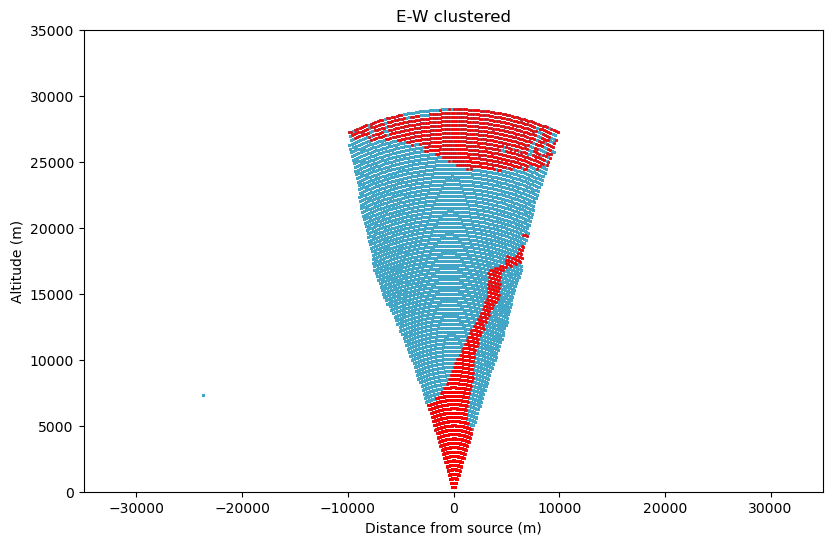

In [73]:
def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title, time_slice, plot_flg):
    group_t = dfa.groupby('time')
    
    if time_slice not in group_t.groups:
        print(f"Time slice {time_slice} not found in the data.")
        return None, None
    
    df_ = group_t.get_group(time_slice).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
    wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

    wi, land_wi = [], []
    xi, land_xi = [], []

    for i in range(df_.shape[0]):
        x0 = df_.loc[i, dist_axis]
        dz_dx = wave_eq.derivative()(x0)
        if dz_dx != 0:
            n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

            if np.abs(n_slope) >= 70:
                land_x = x0 + wave_eq(x0) * dz_dx
                wi.append(i)
                xi.append(land_x)
                
                if np.abs(land_x) <= 65:
                    land_wi.append(i)
                    land_xi.append(land_x)
    if plot_flg:
        plt.subplot(1, 2, subplot_position)
        plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
        plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')
        4545
        dist = 1000 * 35
    
        plt.xlim((-dist, dist))
        plt.ylim((0, dist))
        plt.xlabel("Distance from source (m)")
        plt.ylabel("Altitude (m)")
        plt.title(title)
        plt.grid()
    
    return xi, land_xi

def find_nearest_location(locations, current_loc):
    distances = np.abs(np.array(locations) - current_loc)
    nearest_index = np.argmin(distances)
    return locations[nearest_index]

def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

def window_points(xi, window_size, top_no_of_windows):
    top_windows, midpt_windows = [], []
    x_l_sorted = np.sort(xi)
    
    for i in range(len(x_l_sorted)):
        window_start = x_l_sorted[i]
        window_end = window_start + window_size
        
        count_points = count_points_in_window(window_start, window_end, x_l_sorted)
    
        if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
            top_windows.append((window_start, window_end, count_points))
            midpt_windows.append((window_start + window_end) / 2)

    top_windows, midpt_windows = zip(*sorted(zip(top_windows, midpt_windows), key=lambda x: x[0][2], reverse=True))
    top_windows = top_windows[:top_no_of_windows]
    midpt_windows = midpt_windows[:top_no_of_windows]

    return top_windows, midpt_windows


dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)

plt.figure(figsize=(21, 6))
dist_axis, altitude_axis = 'y', 'z'
window_size = 130
top_no_of_windows = 25

acoustic_source_loc = []
initial_loc = 0 

for time_slice in dfa['time'].unique():
    if time_slice!=0:
        xi, land_xi = process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, 'E-W', time_slice, False)
        
        if xi is not None:
            top_windows, midpt_windows = window_points(xi, window_size, top_no_of_windows)
            
            if top_windows:
                nearest_loc = find_nearest_location(midpt_windows, initial_loc)
                acoustic_source_loc.append(nearest_loc)
                initial_loc = nearest_loc
                df_n = dfa_ew.copy()
                df_n[dist_axis] = df_n[dist_axis] - nearest_loc
                process_and_plot(df_n, dist_axis, altitude_axis, 1, 'E-W Adjusted', time_slice, True)

acoustic_source_loc = np.array(acoustic_source_loc).reshape(-1, 1)
eps = 5
min_samples = 3

db = DBSCAN(eps=eps,min_samples=min_samples).fit(acoustic_source_loc) 
labels = db.labels_
unique_labels = set(labels)
unique_labels.discard(-1)

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = acoustic_source_loc[class_member_mask]
    cluster_center = np.mean(xy)
    cluster_centers.append(cluster_center)

print(f'Cluster centers: {cluster_centers}')
      
for center in cluster_centers:
    for time_slice in dfa['time'].unique():
        if time_slice!=0:
            dfa_ew_n = dfa_ew.copy()
            dfa_ew_n[dist_axis] = dfa_ew_n[dist_axis] - center
            process_and_plot(df_n, dist_axis, altitude_axis, 2, 'E-W clustered', time_slice, True)

Cluster centers: [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]


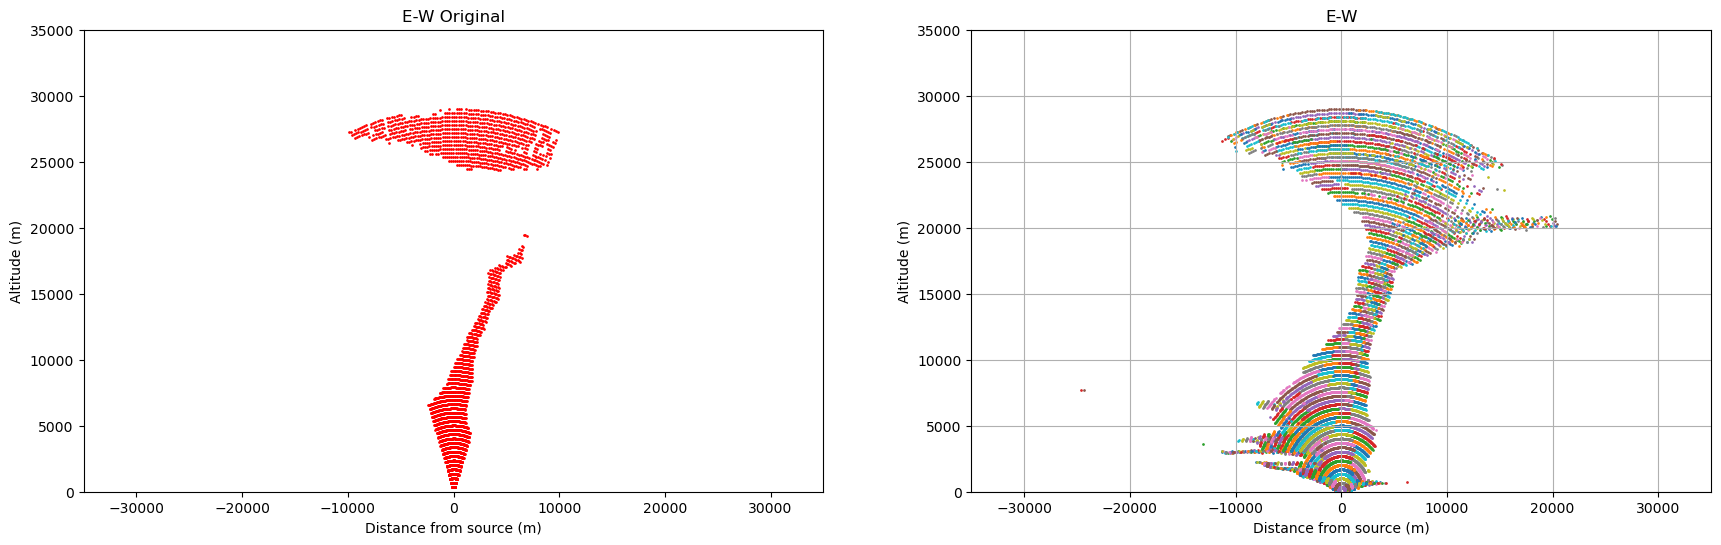

In [4]:
def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title, time_slice, plot_flg, wave_plt_flg):
    group_t = dfa.groupby('time')
    
    if time_slice not in group_t.groups:
        print(f"Time slice {time_slice} not found in the data.")
        return None, None
    
    df_ = group_t.get_group(time_slice).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
    wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

    wi, land_wi = [], []
    xi, land_xi = [], []

    for i in range(df_.shape[0]):
        x0 = df_.loc[i, dist_axis]
        dz_dx = wave_eq.derivative()(x0)
        if dz_dx != 0:
            n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

            if np.abs(n_slope) >= 70:
                land_x = x0 + wave_eq(x0) * dz_dx
                wi.append(i)
                xi.append(land_x)
                
                if np.abs(land_x) <= 65:
                    land_wi.append(i)
                    land_xi.append(land_x)
                    
    if plot_flg:
        plt.subplot(1, 2, subplot_position)
        plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')
        
        if wave_plt_flg:
             plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
            
        dist = 1000 * 35
    
        plt.xlim((-dist, dist))
        plt.ylim((0, dist))
        plt.xlabel("Distance from source (m)")
        plt.ylabel("Altitude (m)")
        plt.title(title)
        plt.grid()
    
    return xi, land_xi

def find_nearest_location(locations, current_loc):
    distances = np.abs(np.array(locations) - current_loc)
    nearest_index = np.argmin(distances)
    return locations[nearest_index]

def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

def window_points(xi, window_size, top_no_of_windows):
    top_windows, midpt_windows = [], []
    x_l_sorted = np.sort(xi)
    
    for i in range(len(x_l_sorted)):
        window_start = x_l_sorted[i]
        window_end = window_start + window_size
        
        count_points = count_points_in_window(window_start, window_end, x_l_sorted)
    
        if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
            top_windows.append((window_start, window_end, count_points))
            midpt_windows.append((window_start + window_end) / 2)

    top_windows, midpt_windows = zip(*sorted(zip(top_windows, midpt_windows), key=lambda x: x[0][2], reverse=True))
    top_windows = top_windows[:top_no_of_windows]
    midpt_windows = midpt_windows[:top_no_of_windows]

    return top_windows, midpt_windows

# Load data
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)

dist_axis, altitude_axis = 'y', 'z'
window_size = 130
top_no_of_windows = 25

acoustic_source_loc = []
initial_loc = 0 

for time_slice in dfa['time'].unique():
    if time_slice != 0:
        xi, land_xi = process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, 'E-W', time_slice, False, False)
        
        if xi is not None:
            top_windows, midpt_windows = window_points(xi, window_size, top_no_of_windows)
            
            if top_windows:
                nearest_loc = find_nearest_location(midpt_windows, initial_loc)
                acoustic_source_loc.append(nearest_loc)
                # initial_loc = nearest_loc

acoustic_source_loc = np.array(acoustic_source_loc).reshape(-1, 1)

eps = 5
min_samples = 3

db = DBSCAN(eps=eps,min_samples=min_samples).fit(acoustic_source_loc) 
labels = db.labels_

unique_labels = set(labels)
unique_labels.discard(-1)

cluster_centers = []

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = acoustic_source_loc[class_member_mask]
    cluster_center = np.mean(xy)
    cluster_centers.append(cluster_center)

print(f'Cluster centers: {cluster_centers}')

plt.figure(figsize=(21, 6))

for time_slice in dfa['time'].unique():
    if time_slice != 0:
        process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, 'E-W Original', time_slice, plot_flg = True, wave_plt_flg=False)

for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] = dfa_ew_n['y'] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice!=0:  
            df_ = group_t.get_group(time_slice).sort_values('y')
            df_ = df_.drop_duplicates(subset='y')
            
            wave_eq = CubicSpline(df_['y'],df_['z'])
            
            x_l = []
            y_l = []
            for x0 in df_['y'].to_numpy():
                
                dz_dx = wave_eq.derivative()(x0)
            
                land_x = x0 + wave_eq(x0) * dz_dx
                if np.abs(land_x) < 50:
                    x_l.append(x0)
                    y_l.append(wave_eq(x0))
            
            plt.subplot(1,2,2)
            plt.scatter(x_l,y_l, s=0.9)
    
    dist = 35 * 1000
    plt.xlim((-dist,dist))
    plt.ylim((0,dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title('E-W')
    plt.grid()

plt.show()

In [78]:
for center in cluster_centers:
    print(center)

81.15718011602955
-306.6061345522271
-356.54376277219893
-804.6314734207223
-823.2474881555952


Cluster centers: [-258.944391     11.90806096 -562.60633325]


/home/murali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


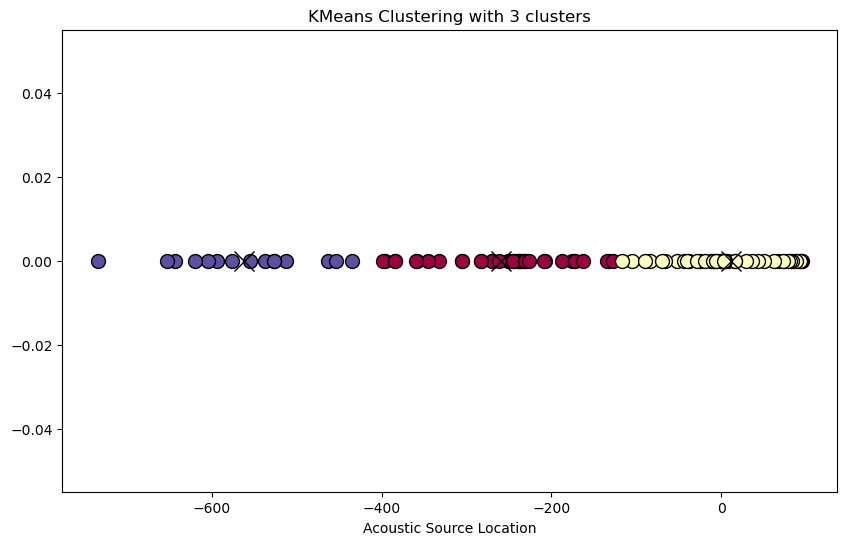

In [49]:
import numpy as np
import matplotlib.pyplot as plt


# Sample acoustic_source_loc points for illustration
acoustic_source_loc = np.array(acoustic_source_loc).reshape(-1, 1)

# Number of clusters
n_clusters = 3  # Adjust this value based on your data

# Apply KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(acoustic_source_loc)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print(f'Cluster centers: {cluster_centers.flatten()}')

# Plotting the clusters
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = acoustic_source_loc[class_member_mask]
    plt.plot(xy, np.zeros_like(xy), 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)

# Plotting the cluster centers
for center in cluster_centers:
    plt.plot(center, 0, 'x', markerfacecolor='black', markeredgecolor='k', markersize=15)

plt.title(f'KMeans Clustering with {n_clusters} clusters')
plt.xlabel('Acoustic Source Location')
plt.show()

/home/murali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


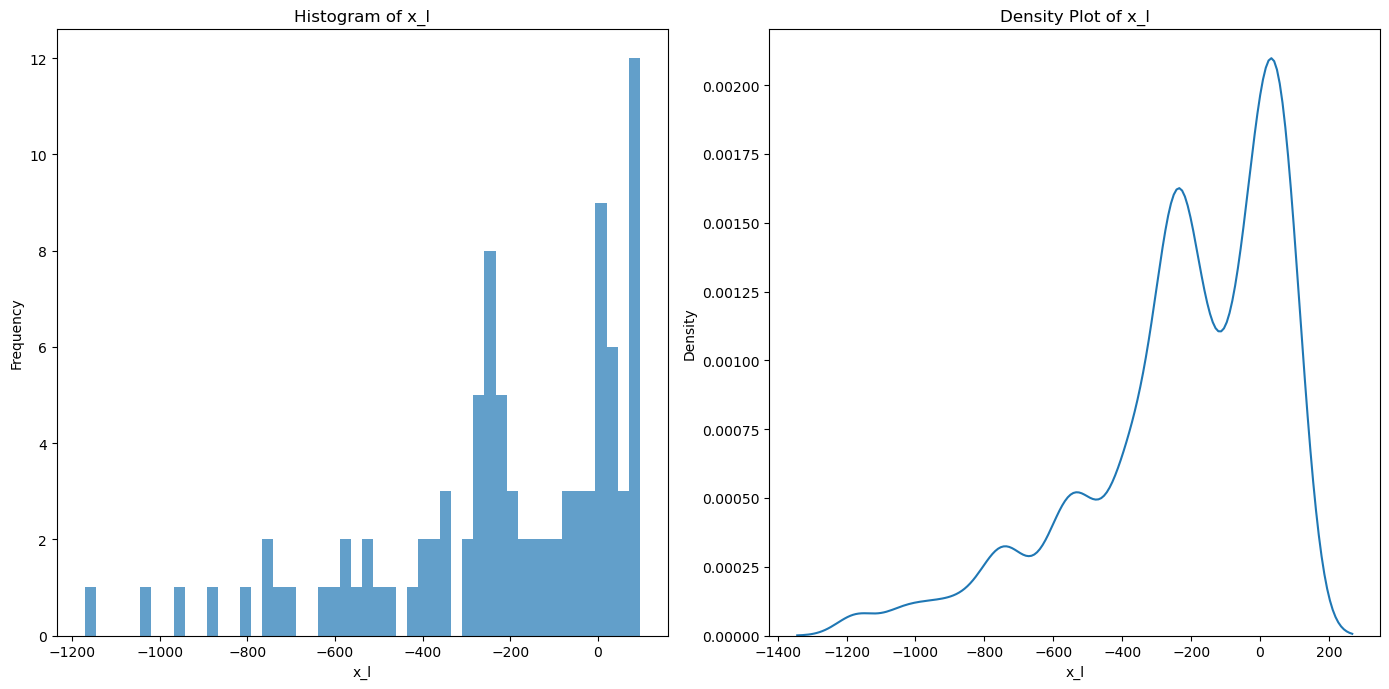

In [128]:
plt.figure(figsize=(14, 7))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(acoustic_source_loc, bins=50, alpha=0.7)
plt.xlabel("x_l")
plt.ylabel("Frequency")
plt.title("Histogram of x_l")

# Density plot
plt.subplot(1, 2, 2)
sns.kdeplot(acoustic_source_loc, bw_adjust=0.5)
plt.xlabel("x_l")
plt.ylabel("Density")
plt.title("Density Plot of x_l")

plt.tight_layout()
plt.show()

In [46]:
x_l_sorted = np.sort()
window_size = 130
top_no_of_windows = 10
top_windows = []

def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

for i in range(len(x_l_sorted)):
    window_start = x_l_sorted[i]
    window_end = window_start + window_size
    
    count_points = count_points_in_window(window_start, window_end, x_l_sorted)

    if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
        top_windows.append((window_start, window_end, count_points))
        top_windows = sorted(top_windows, key=lambda x: x[2], reverse=True)[:top_no_of_windows]

plt.figure(figsize=(14, 7))
plt.scatter(x_l_sorted, np.zeros_like(x_l_sorted), s=10, label='x_l points')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, (start, end, count) in enumerate(top_windows):
    plt.axvspan(start, end, color=colors[i], alpha=0.3, label=f'Window {i+1}: {count} points')

plt.xlabel("x_l")
plt.ylabel("Density")
plt.title(f"Top {top_no_of_windows} Densest 130-meter Windows in x_l")
plt.legend()
plt.show()

for i, (start, end, count) in enumerate(top_windows):
    print(f"Number of points in this window: {count} at centre: {(start + end)/2}\n")


Number of points in this window: 29 at centre: -343.73167717346087

Number of points in this window: 29 at centre: -340.5553714032917

Number of points in this window: 29 at centre: -325.2876411514967

Number of points in this window: 29 at centre: -305.9234448634693

Number of points in this window: 28 at centre: -338.0124995439787

Number of points in this window: 28 at centre: -324.984192977161

Number of points in this window: 28 at centre: -305.2747512951373

Number of points in this window: 27 at centre: -334.0851968549546

Number of points in this window: 27 at centre: -321.76424613266

Number of points in this window: 27 at centre: -304.28795372617924



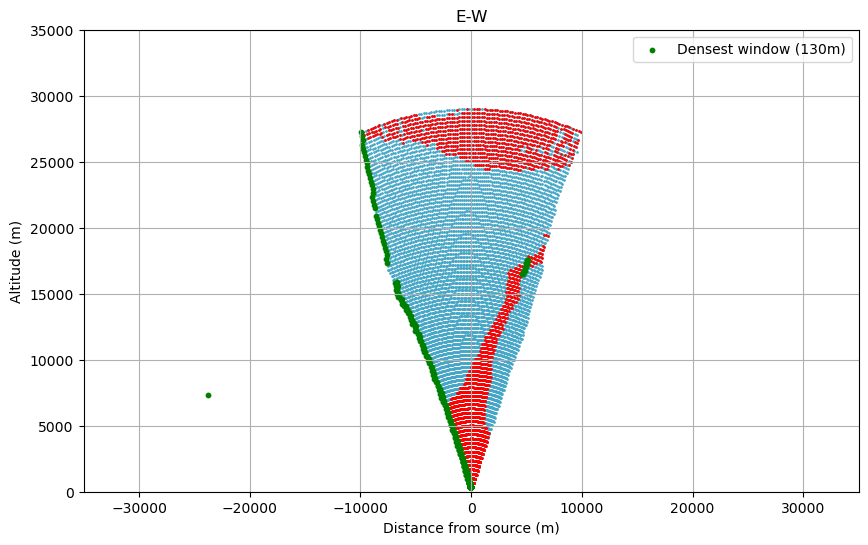

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Read and filter data
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'].between(-np.pi/2, np.pi/2)) & (dfa['phi'] >= 0)].reset_index(drop=True)

# Group by time
group_t = dfa.groupby('time')

plt.figure(figsize=(10, 6))
dist_axis, altitude_axis = 'y', 'z'

# Initialize lists to store densest window points
densest_x = []
densest_y = []

for t in dfa['time'].unique():
    if t != 0:
        df_ = group_t.get_group(t).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
        wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])
        wi, land_wi = [], []
        
        for i in range(df_.shape[0] - 1):
            x0 = df_.loc[i, dist_axis]
            dz_dx = wave_eq.derivative()(x0)
            if dz_dx != 0:
                n_slope = np.rad2deg(np.arctan(-1 / dz_dx))
                
                if np.abs(n_slope) >= 70:
                    land_x = x0 + wave_eq(x0) * dz_dx
                    wi.append(i)
                    
                    if np.abs(land_x) <= 65:
                        land_wi.append(i)
        
        # Convert wi and land_wi to coordinates
        x_wi = df_.loc[wi, dist_axis].values
        y_wi = df_.loc[wi, altitude_axis].values
        
        # Sort the x_wi for sliding window
        sorted_indices = np.argsort(x_wi)
        x_wi_sorted = x_wi[sorted_indices]
        y_wi_sorted = y_wi[sorted_indices]
        
        # Sliding window analysis
        window_size = 130
        max_points = 0
        densest_start = None

        for i in range(len(x_wi_sorted)):
            window_start = x_wi_sorted[i]
            window_end = window_start + window_size
            count_points = np.sum((x_wi_sorted >= window_start) & (x_wi_sorted <= window_end))
            
            if count_points > max_points:
                max_points = count_points
                densest_start = window_start
        
        densest_end = densest_start + window_size
        densest_indices = (x_wi_sorted >= densest_start) & (x_wi_sorted <= densest_end)
        
        # Store densest points
        densest_x.extend(x_wi_sorted[densest_indices])
        densest_y.extend(y_wi_sorted[densest_indices])
        
        # Plot all points and highlight the densest window
        plt.scatter(x_wi, y_wi, s=0.9, color='#43A6C6')
        plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')

# Highlight the densest window
plt.scatter(densest_x, densest_y, s=10, color='g', label='Densest window (130m)')

dist = 1000 * 35
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.legend()
plt.show()


In [24]:
test = pd.read_csv('/home/murali/Documents/rass/data/radiosonde_grouped_data.csv')
test['Height'].max()

33159.833333333336

In [16]:
def angle_with_x_axis(x, y):
    return np.degrees(np.arctan2(y, x))

def points_in_cone(points, angle_start, angle_width):
    angle_end = angle_start + angle_width
    points_in_cone = []
    
    for point in points:
        x, y = point
        angle = angle_with_x_axis(x, y)
        
        if angle < 0:
            angle += 360
    
        if angle_start <= angle <= angle_end:
            points_in_cone.append(point)
    
    return points_in_cone

points = [(1, 2), (3, 4), (-1, 1), (0, -2), (5, 5)]

angle_start = 45
angle_width = 10

points_within_cone = points_in_cone(points, angle_start, angle_width)

print("Points within the cone:", points_within_cone)

Points within the cone: [(3, 4), (5, 5)]


Points within the cone: [(5, 5)]



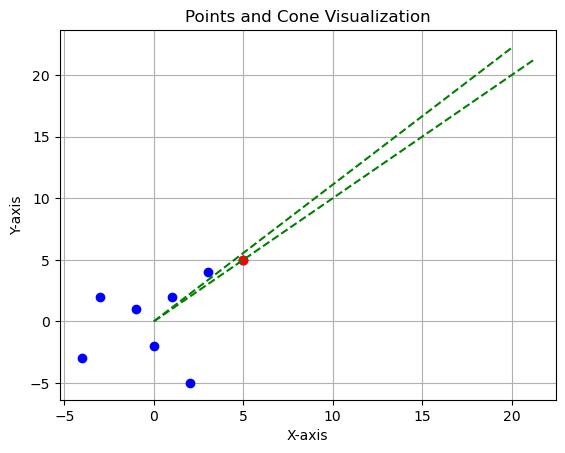

In [10]:
def angle_with_x_axis(x, y):
    return np.degrees(np.arctan2(y, x))

def points_in_cone(points, angle_start, angle_width):
    angle_end = angle_start + angle_width
    points_in_cone = []
    
    for point in points:
        x, y = point
        angle = angle_with_x_axis(x, y)
        
        if angle < 0:
            angle += 360
            
        if angle_start <= angle <= angle_end:
            points_in_cone.append(point)
    
    return points_in_cone

points = [(1, 2), (3, 4), (-1, 1), (0, -2), (5, 5), (-3, 2), (-4, -3), (2, -5)]
angle_start = 45
angle_width = 3 

points_within_cone = points_in_cone(points, angle_start, angle_width)
print("Points within the cone: {}\n".format(points_within_cone))
fig, ax = plt.subplots()

for point in points:
    ax.plot(point[0], point[1], 'bo')

for point in points_within_cone:
    ax.plot(point[0], point[1], 'ro')  

theta1 = np.radians(angle_start)
theta2 = np.radians(angle_start + angle_width)

ax.plot([0, np.cos(theta1)*30], [0, np.sin(theta1)*30], 'g--')  
ax.plot([0, np.cos(theta2)*30], [0, np.sin(theta2)*30], 'g--')  

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Points and Cone Visualization')
plt.grid(True)
plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Function to calculate angle with the x-axis
def angle_with_x_axis(x, y):
    return np.degrees(np.arctan2(y, x))

# Function to get points within a cone
def points_in_cone(points, angle_start, angle_width):
    angle_end = angle_start + angle_width
    points_in_cone = []
    
    for point in points:
        x, y = point
        angle = angle_with_x_axis(x, y)
        
        # Normalize angle to be within [0, 360)
        if angle < 0:
            angle += 360
            
        # Check if the angle lies within the range [angle_start, angle_end]
        if angle_start <= angle <= angle_end:
            points_in_cone.append(point)
    
    return points_in_cone

# Function to generate a range of values with a step
def drange(start, stop, step):
    while start < stop:
        yield start
        start += step

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
cluster_centers = [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]

df_backpts_ideal = pd.DataFrame({'x': [], 'z': []})
df_backpts = pd.DataFrame({'x': [], 'z': []})

for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] -= center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa_ew['time'].unique():
        if time_slice != 0:  
            df_ = group_t.get_group(time_slice).sort_values('y').drop_duplicates(subset='y')
            wave_eq = CubicSpline(df_['y'], df_['z'])

            for x0 in df_['x'].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))
                    
                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        df_backpts_ideal['x'].append(x0)
                        df_backpts_ideal['z'].append(wave_eq(x0))
                        
                        if np.abs(land_x) < 65:
                            df_backpts['x'].append(x0)
                            df_backpts['z'].append(wave_eq(x0))
                            

angle_start = 0
angle_end = 180
angle_step = 1
angle_width = 3

info_lines = []

for angle in drange(angle_start, angle_end, angle_step):
    points_within_cone_i = points_in_cone(df_backpts_ideal.to_numpy(), angle, angle_width)
    points_within_cone = points_in_cone(df_backpts.to_numpy(), angle, angle_width)
    percent_pts = (len(points_within_cone) / len(points_within_cone_i)) * 100 if len(points_within_cone_i) > 0 else 0
    info_lines.append((angle, percent_pts))

plt.scatter(df_backpts_ideal['x'], df_backpts_ideal['z'], s=3, label='max capacity')
plt.scatter(df_backpts['x'], df_backpts['z'], s=3, color='#A52A2A', label='optimized one')

if info_lines:
    theta1 = np.radians(info_lines[0][0])
    theta2 = np.radians(info_lines[0][0] + angle_width)
    plt.plot([0, np.cos(theta1) * 100], [0, np.sin(theta1) * 100], 'g--')
    plt.plot([0, np.cos(theta2) * 100], [0, np.sin(theta2) * 100], 'g--')

dist = 1000 * 35
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.legend()
plt.show()

AttributeError: 'Series' object has no attribute 'append'

ongoing: 85.24453792155352
ongoing: -1.3731725871423701
ongoing: -131.60813413648506
ongoing: -236.67566058151388
ongoing: -40.58280508063732
Max percentage: 33.886757886299876% at angle 87 degrees


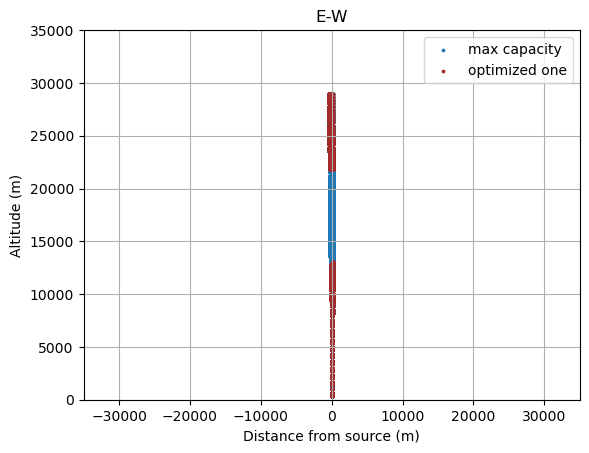

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Function to calculate angle with the x-axis
def angle_with_x_axis(x, y):
    return np.degrees(np.arctan2(y, x))

# Function to get points within a cone
def points_in_cone(points, angle_start, angle_width):
    angle_end = angle_start + angle_width
    points_in_cone = []
    
    for point in points:
        x, y = point
        angle = angle_with_x_axis(x, y)
        
        # Normalize angle to be within [0, 360)
        if angle < 0:
            angle += 360
            
        # Check if the angle lies within the range [angle_start, angle_end]
        if angle_start <= angle <= angle_end:
            points_in_cone.append(point)
    
    return points_in_cone

# Function to generate a range of values with a step
def drange(start, stop, step):
    while start < stop:
        yield start
        start += step

# Load data
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
cluster_centers = [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]

df_backpts_ideal = pd.DataFrame({'x': [], 'z': []})
df_backpts = pd.DataFrame({'x': [], 'z': []})

for center in cluster_centers:
    print(f"ongoing: {center}")
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] -= center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa_ew['time'].unique():
        if time_slice != 0:  
            df_ = group_t.get_group(time_slice).sort_values('y').drop_duplicates(subset='y')
            wave_eq = CubicSpline(df_['y'], df_['z'])

            x_l, y_l = [], []
            xi_l, yi_l = [], []
            for x0 in df_['x'].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))
                    
                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        xi_l.append(x0)
                        yi_l.append(wave_eq(x0))
                        
                        if np.abs(land_x) < 65:
                            x_l.append(x0)
                            y_l.append(wave_eq(x0))
            
            df_backpts = pd.concat([df_backpts, pd.DataFrame({'x': x_l, 'z': y_l})], ignore_index=True)
            df_backpts_ideal = pd.concat([df_backpts_ideal, pd.DataFrame({'x': xi_l, 'z': yi_l})], ignore_index=True)

angle_start = 0
angle_end = 180
angle_step = 1
angle_width = 3

info_lines = []

for angle in drange(angle_start, angle_end, angle_step):
    points_within_cone_i = points_in_cone(df_backpts_ideal[['x', 'z']].to_numpy(), angle, angle_width)
    points_within_cone = points_in_cone(df_backpts[['x', 'z']].to_numpy(), angle, angle_width)
    
    percent_pts = (len(points_within_cone) / len(points_within_cone_i)) * 100 if len(points_within_cone_i) > 0 else 0
    info_lines.append((angle, percent_pts))

max_percentage_info = max(info_lines, key=lambda x: x[1])
max_angle, max_percentage = max_percentage_info

print(f"Max percentage: {max_percentage}% at angle {max_angle} degrees")

plt.scatter(df_backpts_ideal['x'], df_backpts_ideal['z'], s=3, label='max capacity')
plt.scatter(df_backpts['x'], df_backpts['z'], s=3, color='#A52A2A', label='optimized one')

# theta1 = np.radians(max_angle)
# theta2 = np.radians(max_angle + angle_width)
# plt.plot([0, np.cos(theta1) * 100], [0, np.sin(theta1) * 100], 'g--')
# plt.plot([0, np.cos(theta2) * 100], [0, np.sin(theta2) * 100], 'g--')

dist = 1000 * 35
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.legend()
plt.show()

Max percentage: 33.886757886299876% at angle 87 degrees


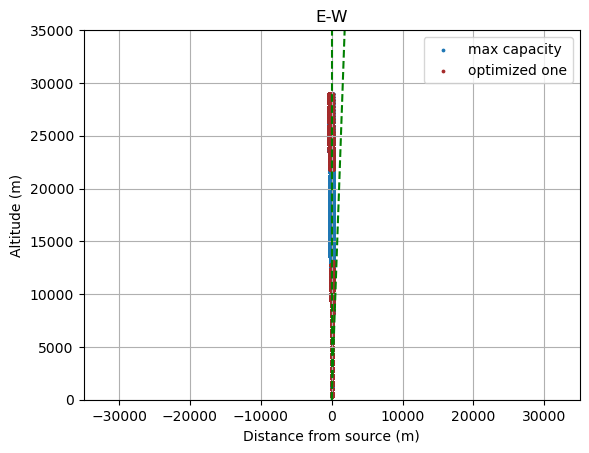

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Function to calculate angle with the x-axis
def angle_with_x_axis(x, y):
    return np.degrees(np.arctan2(y, x))

# Function to get points within a cone
def points_in_cone(points, angle_start, angle_width):
    angle_end = angle_start + angle_width
    points_in_cone = []
    
    for point in points:
        x, y = point
        angle = angle_with_x_axis(x, y)
        
        # Normalize angle to be within [0, 360)
        if angle < 0:
            angle += 360
            
        # Check if the angle lies within the range [angle_start, angle_end]
        if angle_start <= angle <= angle_end:
            points_in_cone.append(point)
    
    return points_in_cone

# Function to generate a range of values with a step
def drange(start, stop, step):
    while start < stop:
        yield start
        start += step

# Load data
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
cluster_centers = [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]

df_backpts_ideal = pd.DataFrame({'x': [], 'z': []})
df_backpts = pd.DataFrame({'x': [], 'z': []})

for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] -= center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa_ew['time'].unique():
        if time_slice != 0:  
            df_ = group_t.get_group(time_slice).sort_values('y').drop_duplicates(subset='y')
            wave_eq = CubicSpline(df_['y'], df_['z'])

            x_l, y_l = [], []
            xi_l, yi_l = [], []
            for x0 in df_['x'].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))
                    
                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        xi_l.append(x0)
                        yi_l.append(wave_eq(x0))
                        
                        if np.abs(land_x) < 65:
                            x_l.append(x0)
                            y_l.append(wave_eq(x0))
            
            df_backpts = pd.concat([df_backpts, pd.DataFrame({'x': x_l, 'z': y_l})], ignore_index=True)
            df_backpts_ideal = pd.concat([df_backpts_ideal, pd.DataFrame({'x': xi_l, 'z': yi_l})], ignore_index=True)

angle_width = 3
angle_start = 0
angle_end = 180 - angle_width
angle_step = 1


info_lines = []

for angle in drange(angle_start, angle_end, angle_step):
    points_within_cone_i = points_in_cone(df_backpts_ideal[['x', 'z']].to_numpy(), angle, angle_width)
    points_within_cone = points_in_cone(df_backpts[['x', 'z']].to_numpy(), angle, angle_width)
    percent_pts = (len(points_within_cone) / len(points_within_cone_i)) * 100 if len(points_within_cone_i) > 0 else 0
    info_lines.append((angle, percent_pts))

# Find the angle with the maximum percentage
max_percentage_info = max(info_lines, key=lambda x: x[1])
max_angle, max_percentage = max_percentage_info

print(f"Max percentage: {max_percentage}% at angle {max_angle} degrees")

plt.scatter(df_backpts_ideal['x'], df_backpts_ideal['z'], s=3, label='max capacity')
plt.scatter(df_backpts['x'], df_backpts['z'], s=3, color='#A52A2A', label='optimized one')

theta1 = np.radians(max_angle)
theta2 = np.radians(max_angle + angle_width)
plt.plot([0, np.cos(theta1) * dist], [0, np.sin(theta1) * dist], 'g--')
plt.plot([0, np.cos(theta2) * dist], [0, np.sin(theta2) * dist], 'g--')

dist = 1000 * 35
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()
plt.legend()
plt.show()

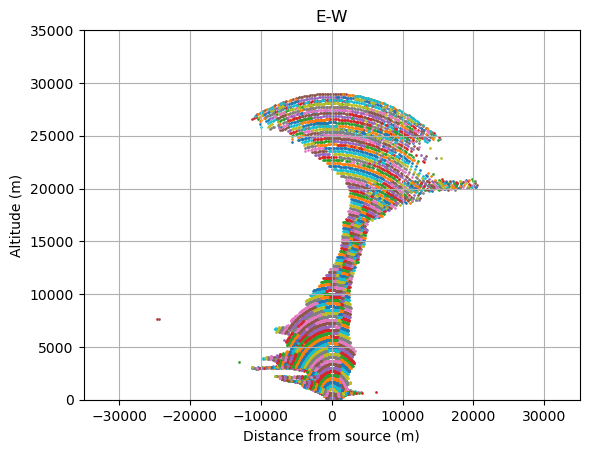

In [21]:
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
cluster_centers = [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]

for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] = dfa_ew_n['y'] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice!=0:  
            df_ = group_t.get_group(time_slice).sort_values('y')
            df_ = df_.drop_duplicates(subset='y')
            wave_eq = CubicSpline(df_['y'],df_['z'])
            
            x_l = []
            y_l = []
            for x0 in df_['y'].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
            
                land_x = x0 + wave_eq(x0) * dz_dx
                if np.abs(land_x) < 50:
                    x_l.append(x0)
                    y_l.append(wave_eq(x0))
            
            plt.scatter(x_l,y_l, s=0.9)
    
    dist = 35 * 1000
    plt.xlim((-dist,dist))
    plt.ylim((0,dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title('E-W')
    plt.grid()

plt.show()

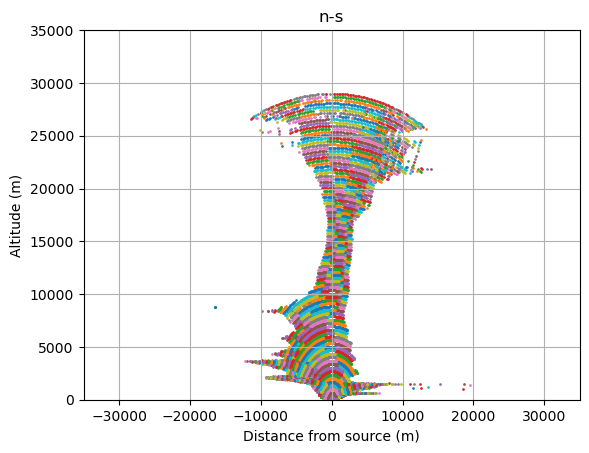

In [31]:
dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dfa_ew = dfa[(dfa['phi'] == 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
cluster_centers = [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]

for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['x'] = dfa_ew_n['x'] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice!=0:  
            df_ = group_t.get_group(time_slice).sort_values('x')
            df_ = df_.drop_duplicates(subset='x')
            wave_eq = CubicSpline(df_['x'],df_['z'])
            
            x_l = []
            y_l = []
            for x0 in df_['x'].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
            
                land_x = x0 + wave_eq(x0) * dz_dx
                if np.abs(land_x) < 50:
                    x_l.append(x0)
                    y_l.append(wave_eq(x0))
            
            plt.scatter(x_l,y_l, s=0.9)
    
    dist = 35 * 1000
    plt.xlim((-dist,dist))
    plt.ylim((0,dist))
    plt.xlabel("Distance from source (m)")
    plt.ylabel("Altitude (m)")
    plt.title('n-s')
    plt.grid()
    
plt.show()

/tmp/ipykernel_3642/1469219182.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_distance = cone_data.groupby(pd.cut(cone_data['altitude'], altitude_bins))['distance'].mean()


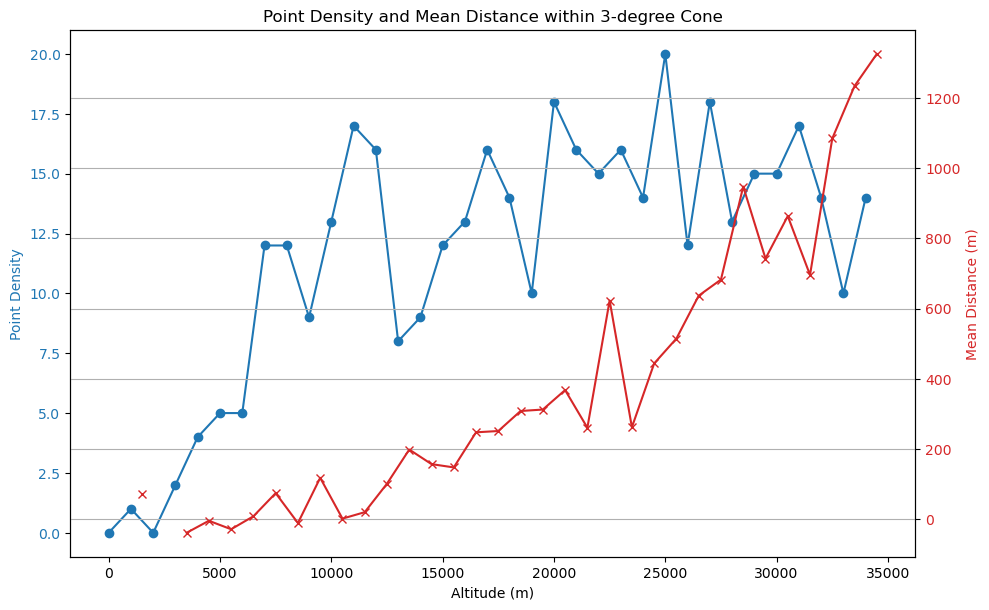

/tmp/ipykernel_3642/1469219182.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cone_data['cluster'] = clustering.labels_


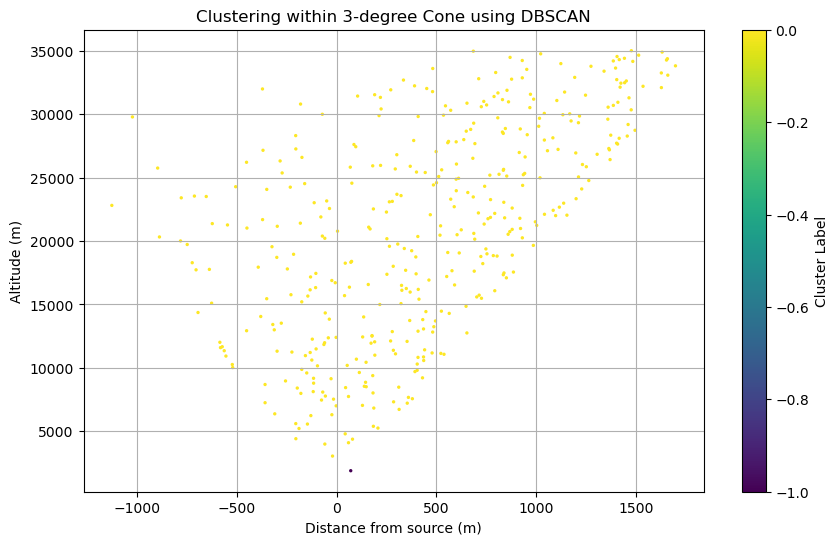

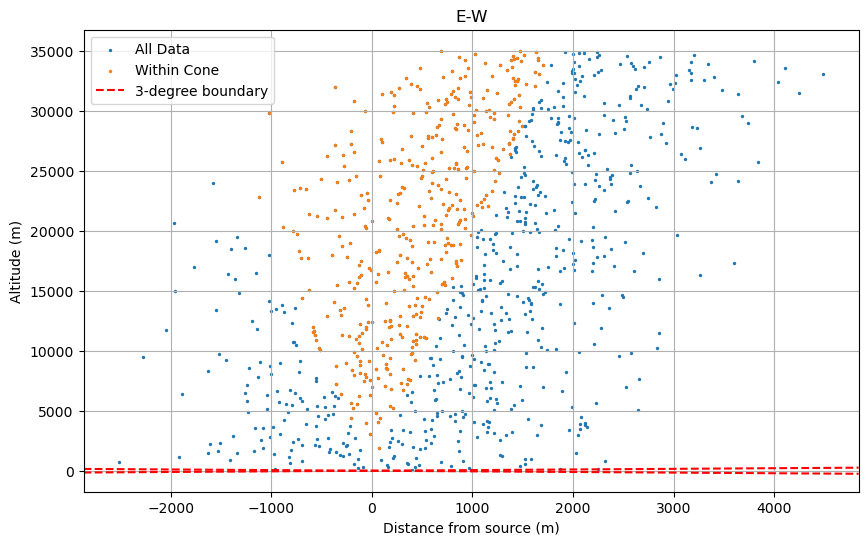

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Example data creation
# Replace this with loading your actual data
np.random.seed(0)
altitude = np.linspace(0, 35000, 1000)
distance = np.tan(np.deg2rad(3)) * altitude + np.random.normal(0, 1000, 1000)
data = pd.DataFrame({'distance': distance, 'altitude': altitude})

# Define the cone boundaries
cone_slope = np.tan(np.deg2rad(3))
data['in_cone'] = np.abs(data['distance']) <= cone_slope * data['altitude']

# Extract data points within the cone
cone_data = data[data['in_cone']]

# Analyze continuity: Calculate point density per altitude range
altitude_bins = np.linspace(0, 35000, 36)  # 1 km bins
density, _ = np.histogram(cone_data['altitude'], bins=altitude_bins)

# Analyze distribution: Calculate mean distance per altitude range
mean_distance = cone_data.groupby(pd.cut(cone_data['altitude'], altitude_bins))['distance'].mean()

# Plot density and mean distance
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Altitude (m)')
ax1.set_ylabel('Point Density', color='tab:blue')
ax1.plot(altitude_bins[:-1], density, marker='o', color='tab:blue', label='Density')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mean Distance (m)', color='tab:red')ch
ax2.plot(mean_distance.index.categories.mid, mean_distance, marker='x', color='tab:red', label='Mean Distance')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Point Density and Mean Distance within 3-degree Cone')
plt.grid(True)
plt.show()

# Clustering analysis using DBSCAN
eps = 1000  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Perform DBSCAN clustering
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(cone_data[['distance', 'altitude']])
cone_data['cluster'] = clustering.labels_

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(cone_data['distance'], cone_data['altitude'], c=cone_data['cluster'], cmap='viridis', s=2)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('Distance from source (m)')
plt.ylabel('Altitude (m)')
plt.title('Clustering within 3-degree Cone using DBSCAN')
plt.grid(True)
plt.show()

# Plot the original data with the cone highlighted
plt.figure(figsize=(10, 6))
plt.scatter(data['distance'], data['altitude'], s=2, label='All Data')
plt.scatter(cone_data['distance'], cone_data['altitude'], s=2, label='Within Cone')
plt.axline((0, 0), slope=cone_slope, color='r', linestyle='--', label='3-degree boundary')
plt.axline((0, 0), slope=-cone_slope, color='r', linestyle='--')
plt.xlabel('Distance from source (m)')
plt.ylabel('Altitude (m)')
plt.title('E-W')
plt.legend()
plt.grid(True)
plt.show()


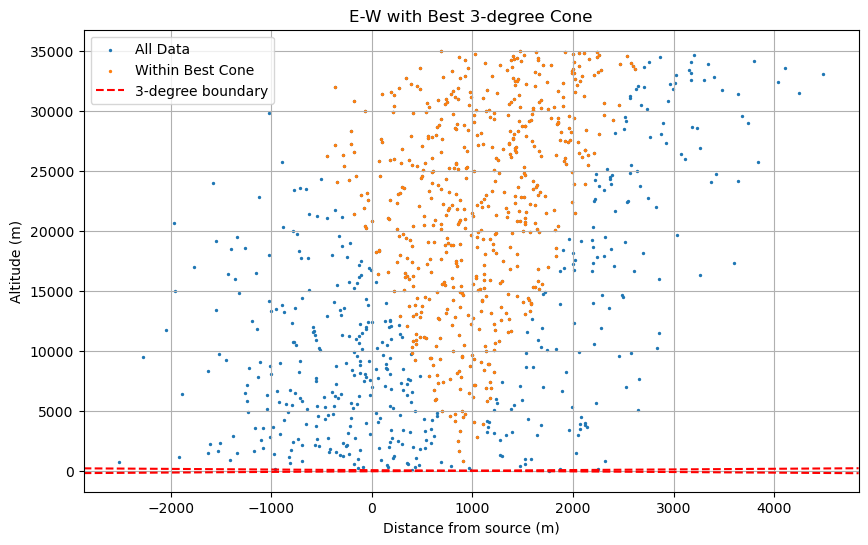

Best Central Axis: 909.0909090909045
Maximum Continuity Metric: 550


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Example data creation
# Replace this with loading your actual data
np.random.seed(0)
altitude = np.linspace(0, 35000, 1000)
distance = np.tan(np.deg2rad(3)) * altitude + np.random.normal(0, 1000, 1000)
data = pd.DataFrame({'distance': distance, 'altitude': altitude})

# Function to calculate continuity metric for a given cone axis
def calculate_continuity_metric(data, central_axis):
    cone_slope = np.tan(np.deg2rad(3))
    data['in_cone'] = np.abs(data['distance'] - central_axis) <= cone_slope * data['altitude']
    cone_data = data[data['in_cone']]
    
    # Calculate point density per altitude range
    altitude_bins = np.linspace(0, 35000, 36)  # 1 km bins
    density, _ = np.histogram(cone_data['altitude'], bins=altitude_bins)
    
    # Define continuity metric as the sum of density
    continuity_metric = np.sum(density)
    return continuity_metric, cone_data

# Iterate over different central axes to find the cone with maximum continuity
central_axes = np.linspace(-30000, 30000, 100)  # Example range and number of central axes
max_continuity_metric = -np.inf
best_axis = None
best_cone_data = None

for axis in central_axes:
    continuity_metric, cone_data = calculate_continuity_metric(data, axis)
    if continuity_metric > max_continuity_metric:
        max_continuity_metric = continuity_metric
        best_axis = axis
        best_cone_data = cone_data

# Plot the best cone with maximum continuity
plt.figure(figsize=(10, 6))
plt.scatter(data['distance'], data['altitude'], s=2, label='All Data')
plt.scatter(best_cone_data['distance'], best_cone_data['altitude'], s=2, label='Within Best Cone')
plt.axline((best_axis, 0), slope=np.tan(np.deg2rad(3)), color='r', linestyle='--', label='3-degree boundary')
plt.axline((best_axis, 0), slope=-np.tan(np.deg2rad(3)), color='r', linestyle='--')
plt.xlabel('Distance from source (m)')
plt.ylabel('Altitude (m)')
plt.title('E-W with Best 3-degree Cone')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Central Axis: {best_axis}")
print(f"Maximum Continuity Metric: {max_continuity_metric}")

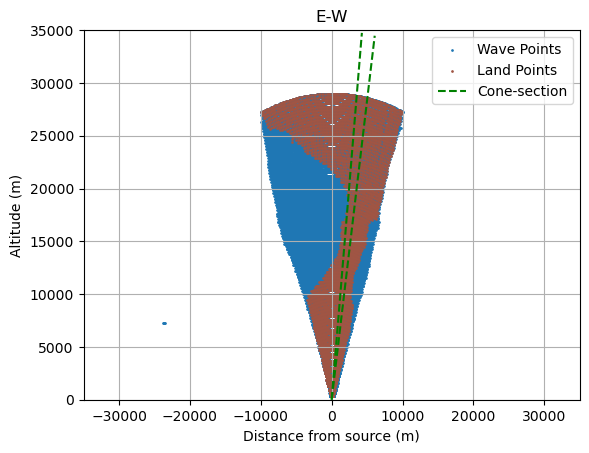

In [28]:
def angle_with_x_axis(x, y):
    return np.degrees(np.arctan2(y, x))

def points_in_cone(points, angle_start, angle_width):
    angle_end = angle_start + angle_width
    points_in_cone = []
    
    for point in points:
        x, y = point
        angle = angle_with_x_axis(x, y)
        
        if angle < 0:
            angle += 360
            
        if angle_start <= angle <= angle_end:
            points_in_cone.append(point)
    
    return points_in_cone

def drange(start, stop, step):
    while start < stop:
        yield start
        start += step

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')

dfa_ew = dfa[(dfa['phi'] != 0) & (dfa['z'] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
cluster_centers = [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]

points_l = [] 
points_w = []
for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n['y'] = dfa_ew_n['y'] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice != 0:  
            df_ = group_t.get_group(time_slice).sort_values('y')
            df_ = df_.drop_duplicates(subset='y').reset_index(drop=True)
            wave_eq = CubicSpline(df_['y'], df_['z'])
            
            for x0 in df_['y'].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        points_w.append((x0, df_.loc[df_['y'] == x0, 'z'].values[0]))
                        
                        if np.abs(land_x) < 65:
                            points_l.append((x0, df_.loc[df_['y'] == x0, 'z'].values[0]))

points_w = list(set(points_w))
points_l = list(set(points_l))

points_w = np.array(points_w)
points_l = np.array(points_l)

plt.scatter(points_w[:, 0], points_w[:, 1], s=0.9,label='Wave Points' )
plt.scatter(points_l[:, 0], points_l[:, 1], s=0.9, color='#A05544', label='Land Points')

dist = 35 * 1000
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title('E-W')
plt.grid()

angle_width = 3

angle_start = 68
angle_end = 113 - angle_width
angle_step = 1

angle_f, percent_pts_f = 0, 0

for angle in drange(angle_start, angle_end, angle_step):
    points_within_cone_w = points_in_cone(points_w, angle, angle_width)
    points_within_cone_l = points_in_cone(points_l, angle, angle_width)
    percent_pts = (len(points_within_cone_l) / len(points_within_cone_w)) * 100 if len(points_within_cone_w) > 0 else 0
    if percent_pts_f <= percent_pts:
        angle_f = angle
        percent_pts_f = percent_pts

theta1 = np.radians(angle_f)
theta2 = np.radians(angle_f + angle_width)

plt.plot([0, np.cos(theta1) * dist], [0, np.sin(theta1) * dist], 'g--', label='Cone-section')
plt.plot([0, np.cos(theta2) * dist], [0, np.sin(theta2) * dist], 'g--')
# print(f"percentage inside the cone: {percent_pts_f}, angle betwween: {angle_f} - {angle_f + angle_width}")
plt.legend()
plt.show()

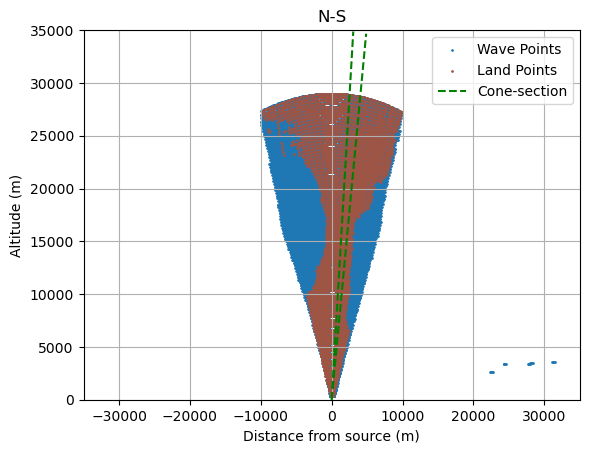

In [33]:
def angle_with_x_axis(x, y):
    return np.degrees(np.arctan2(y, x))

def points_in_cone(points, angle_start, angle_width):
    angle_end = angle_start + angle_width
    points_in_cone = []
    
    for point in points:
        x, y = point
        angle = angle_with_x_axis(x, y)
        
        if angle < 0:
            angle += 360
            
        if angle_start <= angle <= angle_end:
            points_in_cone.append(point)
    
    return points_in_cone

def drange(start, stop, step):
    while start < stop:
        yield start
        start += step

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dist_axis, altitude_axis = 'x', 'z'

if dist_axis=='x':
    dfa_ew = dfa[(dfa['phi'] == 0) & (dfa[altitude_axis] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
    title = 'N-S'
else:
    dfa_ew = dfa[(dfa['phi'] != 0) & (dfa[altitude_axis] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
    title = 'E-W'
    
cluster_centers = [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]

points_l = [] 
points_w = []
for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n[dist_axis] = dfa_ew_n[dist_axis] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice != 0:  
            df_ = group_t.get_group(time_slice).sort_values(dist_axis)
            df_ = df_.drop_duplicates(subset=dist_axis).reset_index(drop=True)
            wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])
            
            for x0 in df_[dist_axis].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        points_w.append((x0, df_.loc[df_[dist_axis] == x0, altitude_axis].values[0]))
                        
                        if np.abs(land_x) < 65:
                            points_l.append((x0, df_.loc[df_[dist_axis] == x0, altitude_axis].values[0]))

points_w = list(set(points_w))
points_l = list(set(points_l))

points_w = np.array(points_w)
points_l = np.array(points_l)

plt.scatter(points_w[:, 0], points_w[:, 1], s=0.9,label='Wave Points' )
plt.scatter(points_l[:, 0], points_l[:, 1], s=0.9, color='#A05544', label='Land Points')

dist = 35 * 1000
plt.xlim((-dist, dist))
plt.ylim((0, dist))
plt.xlabel("Distance from source (m)")
plt.ylabel("Altitude (m)")
plt.title(title)
plt.grid()

angle_width = 3

angle_start = 68
angle_end = 113 - angle_width
angle_step = 1

angle_f, percent_pts_f = 0, 0

for angle in drange(angle_start, angle_end, angle_step):
    points_within_cone_w = points_in_cone(points_w, angle, angle_width)
    points_within_cone_l = points_in_cone(points_l, angle, angle_width)
    percent_pts = (len(points_within_cone_l) / len(points_within_cone_w)) * 100 if len(points_within_cone_w) > 0 else 0
    if percent_pts_f <= percent_pts:
        angle_f = angle
        percent_pts_f = percent_pts

theta1 = np.radians(angle_f)
theta2 = np.radians(angle_f + angle_width)

plt.plot([0, np.cos(theta1) * dist], [0, np.sin(theta1) * dist], 'g--', label='Cone-section')
plt.plot([0, np.cos(theta2) * dist], [0, np.sin(theta2) * dist], 'g--')
# print(f"percentage inside the cone: {percent_pts_f}, angle betwween: {angle_f} - {angle_f + angle_width}")
plt.legend()
plt.show()

Cluster centers: [85.24453792155352, -1.3731725871423701, -131.60813413648506, -236.67566058151388, -40.58280508063732]


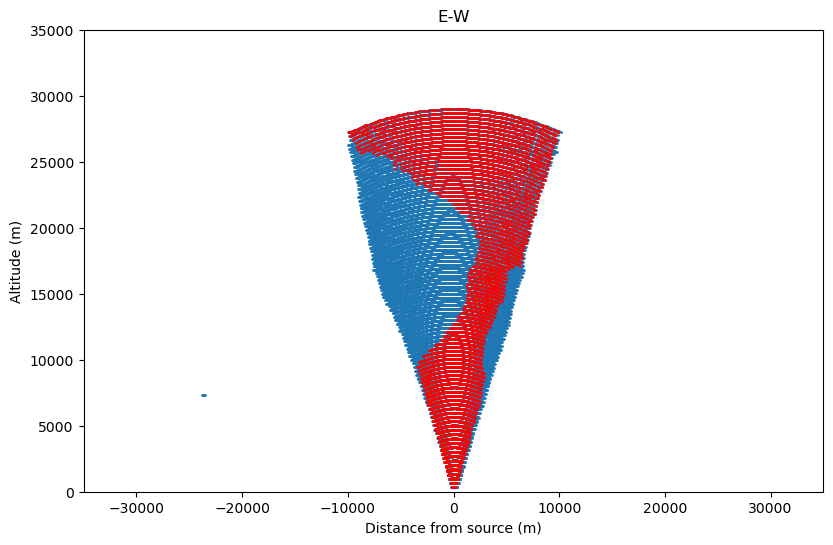

In [38]:
def process_and_plot(dfa, dist_axis, altitude_axis, subplot_position, title, time_slice, plot_flg, wave_plt_flg):
    group_t = dfa.groupby('time')
    
    if time_slice not in group_t.groups:
        print(f"Time slice {time_slice} not found in the data.")
        return None, None
    
    df_ = group_t.get_group(time_slice).sort_values(dist_axis).drop_duplicates(subset=dist_axis).reset_index(drop=True)
    wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])

    wi, land_wi = [], []
    xi, land_xi = [], []

    for i in range(df_.shape[0]):
        x0 = df_.loc[i, dist_axis]
        dz_dx = wave_eq.derivative()(x0)
        if dz_dx != 0:
            n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

            if np.abs(n_slope) >= 70:
                land_x = x0 + wave_eq(x0) * dz_dx
                wi.append(i)
                xi.append(land_x)
                
                if np.abs(land_x) <= 65:
                    land_wi.append(i)
                    land_xi.append(land_x)
                    
    if plot_flg:
        plt.subplot(1, 2, subplot_position)
        plt.scatter(df_.loc[land_wi, dist_axis], df_.loc[land_wi, altitude_axis], s=0.9, color='red')
        
        if wave_plt_flg:
             plt.scatter(df_.loc[wi, dist_axis], df_.loc[wi, altitude_axis], s=0.9, color='#43A6C6')
            
        dist = 1000 * 35
    
        plt.xlim((-dist, dist))
        plt.ylim((0, dist))
        plt.xlabel("Distance from source (m)")
        plt.ylabel("Altitude (m)")
        plt.title(title)
        plt.grid()
    
    return xi, land_xi

def find_nearest_location(locations, current_loc):
    distances = np.abs(np.array(locations) - current_loc)
    nearest_index = np.argmin(distances)
    return locations[nearest_index]

def count_points_in_window(start, end, sorted_array):
    return np.sum((sorted_array >= start) & (sorted_array <= end))

def window_points(xi, window_size, top_no_of_windows):
    top_windows, midpt_windows = [], []
    x_l_sorted = np.sort(xi)
    
    for i in range(len(x_l_sorted)):
        window_start = x_l_sorted[i]
        window_end = window_start + window_size
        
        count_points = count_points_in_window(window_start, window_end, x_l_sorted)
    
        if len(top_windows) < top_no_of_windows or count_points > top_windows[-1][2]:
            top_windows.append((window_start, window_end, count_points))
            midpt_windows.append((window_start + window_end) / 2)

    top_windows, midpt_windows = zip(*sorted(zip(top_windows, midpt_windows), key=lambda x: x[0][2], reverse=True))
    top_windows = top_windows[:top_no_of_windows]
    midpt_windows = midpt_windows[:top_no_of_windows]

    return top_windows, midpt_windows

dfa = pd.read_csv('/home/murali/Documents/rass/simulation/in_py/reflected_waves/wTemp_wWind_cpp_alglib_CS.csv')
dist_axis, altitude_axis = 'y', 'z' 

# window config
window_size = 130
top_no_of_windows = 25
acoustic_source_loc = []
initial_loc = 0 

# DBSCAN config
eps = 5
min_samples = 3

if dist_axis=='x':
    dfa_ew = dfa[(dfa['phi'] == 0) & (dfa[altitude_axis] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
    title = 'N-S'
else:
    dfa_ew = dfa[(dfa['phi'] != 0) & (dfa[altitude_axis] >= 0) & (dfa['theta'] <= np.pi/2) & (dfa['theta'] >= -np.pi/2)].reset_index(drop=True)
    title = 'E-W'

for time_slice in dfa['time'].unique():
    if time_slice != 0:
        xi, land_xi = process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, title, time_slice, False, False)
        
        if xi is not None:
            top_windows, midpt_windows = window_points(xi, window_size, top_no_of_windows)
            
            if top_windows:
                nearest_loc = find_nearest_location(midpt_windows, initial_loc)
                acoustic_source_loc.append(nearest_loc)

acoustic_source_loc = np.array(acoustic_source_loc).reshape(-1, 1)
db = DBSCAN(eps=eps,min_samples=min_samples).fit(acoustic_source_loc) 
labels = db.labels_

unique_labels = set(labels)
unique_labels.discard(-1)

cluster_centers = []

for k in unique_labels:
    class_member_mask = (labels == k)
    xy = acoustic_source_loc[class_member_mask]
    cluster_center = np.mean(xy)
    cluster_centers.append(cluster_center)

print(f'Cluster centers: {cluster_centers}')

plt.figure(figsize=(21, 6))

for time_slice in dfa['time'].unique():
    if time_slice != 0:
        process_and_plot(dfa_ew, dist_axis, altitude_axis, 1, title , time_slice, plot_flg = True, wave_plt_flg=False)

points_l = [] 
points_w = []
for center in cluster_centers:
    dfa_ew_n = dfa_ew.copy()
    dfa_ew_n[dist_axis] = dfa_ew_n[dist_axis] - center
    group_t = dfa_ew_n.groupby('time')
    
    for time_slice in dfa['time'].unique():
        if time_slice != 0:  
            df_ = group_t.get_group(time_slice).sort_values(dist_axis)
            df_ = df_.drop_duplicates(subset=dist_axis).reset_index(drop=True)
            wave_eq = CubicSpline(df_[dist_axis], df_[altitude_axis])
            
            for x0 in df_[dist_axis].to_numpy():
                dz_dx = wave_eq.derivative()(x0)
                
                if dz_dx != 0:
                    n_slope = np.rad2deg(np.arctan(-1 / dz_dx))

                    if np.abs(n_slope) >= 70:
                        land_x = x0 + wave_eq(x0) * dz_dx
                        points_w.append((x0, df_.loc[df_[dist_axis] == x0, altitude_axis].values[0]))
                        
                        if np.abs(land_x) < 65:
                            points_l.append((x0, df_.loc[df_[dist_axis] == x0, altitude_axis].values[0]))

points_w = list(set(points_w))
points_l = list(set(points_l))
points_w = np.array(points_w)
points_l = np.array(points_l)

plt.scatter(points_w[:, 0], points_w[:, 1], s=0.9,label='Wave Points' )
plt.scatter(points_l[:, 0], points_l[:, 1], s=0.9, color='r', label='Land Points')

plt.show()